In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn import metrics
from matplotlib import pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
location = "/content/drive/My Drive/Colab Notebooks/data/rul_hrs DataSet.csv"
df = pd.read_csv(location)

Mounted at /content/drive


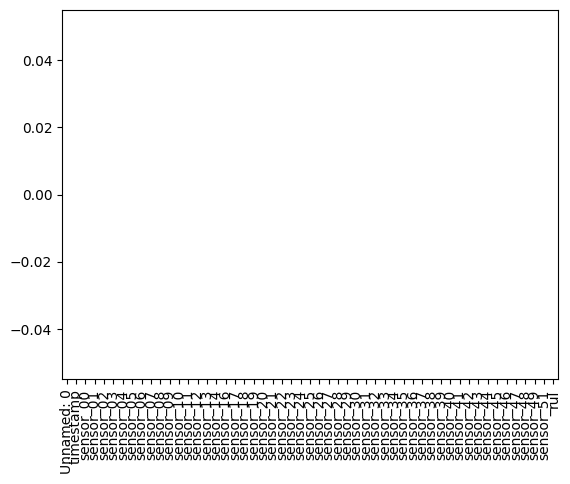

In [ ]:
df.isnull().sum().plot.bar()
plt.show()

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166441 entries, 0 to 166440
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  166441 non-null  int64  
 1   timestamp   166441 non-null  object 
 2   sensor_00   166441 non-null  float64
 3   sensor_01   166441 non-null  float64
 4   sensor_02   166441 non-null  float64
 5   sensor_03   166441 non-null  float64
 6   sensor_04   166441 non-null  float64
 7   sensor_05   166441 non-null  float64
 8   sensor_06   166441 non-null  float64
 9   sensor_07   166441 non-null  float64
 10  sensor_08   166441 non-null  float64
 11  sensor_09   166441 non-null  float64
 12  sensor_10   166441 non-null  float64
 13  sensor_11   166441 non-null  float64
 14  sensor_12   166441 non-null  float64
 15  sensor_13   166441 non-null  float64
 16  sensor_14   166441 non-null  float64
 17  sensor_16   166441 non-null  float64
 18  sensor_17   166441 non-null  float64
 19  se

In [ ]:
df.isna().sum()

Unnamed: 0    0
timestamp     0
sensor_00     0
sensor_01     0
sensor_02     0
sensor_03     0
sensor_04     0
sensor_05     0
sensor_06     0
sensor_07     0
sensor_08     0
sensor_09     0
sensor_10     0
sensor_11     0
sensor_12     0
sensor_13     0
sensor_14     0
sensor_16     0
sensor_17     0
sensor_18     0
sensor_19     0
sensor_20     0
sensor_21     0
sensor_22     0
sensor_23     0
sensor_24     0
sensor_25     0
sensor_26     0
sensor_27     0
sensor_28     0
sensor_29     0
sensor_30     0
sensor_31     0
sensor_32     0
sensor_33     0
sensor_34     0
sensor_35     0
sensor_36     0
sensor_37     0
sensor_38     0
sensor_39     0
sensor_40     0
sensor_41     0
sensor_42     0
sensor_43     0
sensor_44     0
sensor_45     0
sensor_46     0
sensor_47     0
sensor_48     0
sensor_49     0
sensor_51     0
rul           0
dtype: int64

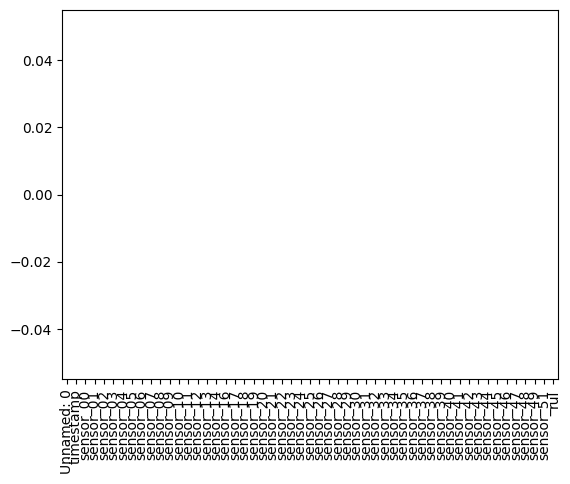

In [ ]:
df.isnull().sum().plot.bar()
plt.show()

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.drop('timestamp', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head().round(2)

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0       2.47      47.09      53.21      46.31     634.38      76.46   
1       2.47      47.09      53.21      46.31     634.38      76.46   
2       2.44      47.35      53.21      46.40     638.89      73.55   
3       2.46      47.09      53.17      46.40     628.12      76.99   
4       2.45      47.14      53.21      46.40     636.46      76.59   

   sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  sensor_43  \
0      13.41      16.13      15.57      15.05  ...      31.77      41.93   
1      13.41      16.13      15.57      15.05  ...      31.77      41.93   
2      13.32      16.04      15.62      15.01  ...      31.77      41.67   
3      13.32      16.25      15.70      15.08  ...      31.51      40.89   
4      13.35      16.21      15.70      15.08  ...      31.51      41.41   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0      39.64      65.68      50.93      38.19     157.99      67.71   
1      39.64      65.68      50.93      38.19     157.99      67.71   
2      39.35      65.39      51.22      38.19     155.96      67.13   
3      39.06      64.81      51.22      38.19     155.96      66.84   
4      38.77      65.10      51.79      38.77     158.28      66.55   

   sensor_51    rul  
0     201.39 285.92  
1     201.39 285.90  
2     203.70 285.88  
3     203.12 285.87  
4     201.39 285.85  

[5 rows x 51 columns]

In [ ]:
df.nsmallest(5, ['rul']).round(2)

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
17155        0.00      53.34      52.82      43.40     202.53      49.79   
24510        1.09      42.53      47.70      41.45     206.04      60.30   
69318        2.26      47.27      52.73      43.45     200.12      66.15   
77790        2.32      47.48      51.48      42.80     612.15      67.30   
128040       0.36      40.19      45.23      40.19     201.37       0.00   

        sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  sensor_43  \
17155        3.22      16.89      16.87      15.08  ...      36.98      50.78   
24510       12.30      15.15      14.19      13.87  ...      29.95      42.71   
69318       13.59      15.91      15.15      14.79  ...      31.25      39.06   
77790       14.06      16.61      15.94      15.60  ...     176.82     202.34   
128040      11.34      15.27      15.18      15.12  ...      24.74      32.29   

        sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
17155       50.93      51.22      50.64      46.01     409.14     121.53   
24510       34.72      31.54      34.43      33.28      59.90      44.56   
69318       35.01      37.91      39.06      45.43     144.68      49.77   
77790       65.68      57.87     127.89     153.94     155.38      65.68   
128040      28.07      28.07      29.51      29.22      29.22      29.51   

        sensor_51  rul  
17155      324.65 0.00  
24510      183.74 0.00  
69318      257.52 0.00  
77790      267.36 0.00  
128040     202.70 0.00  

[5 rows x 51 columns]

In [ ]:
df.nlargest(5, ['rul']).round(2)

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
77791       0.80      47.48      51.48      42.80     611.69      64.33   
77792       0.31      47.53      51.48      42.80     601.50      81.63   
77793       0.31      47.57      51.39      42.80     445.02      95.62   
77794       0.31      47.57      51.48      42.84       3.10      97.97   
77795       0.30      47.61      51.43      42.84       3.38      94.97   

       sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  sensor_43  \
77791       0.03      16.65      16.06      15.55  ...     179.95     201.82   
77792       0.03      16.65      15.85      15.64  ...     179.69     197.92   
77793       0.03      16.57      16.07      15.55  ...     171.61     187.50   
77794       0.01      16.65      16.29      16.35  ...     166.41     180.21   
77795       0.01      16.70      16.38      16.36  ...     162.76     176.04   

       sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
77791      61.34      55.27     120.66     146.12     147.86      64.24   
77792      59.90      53.82     115.45     137.73     154.51      69.16   
77793      57.87      51.79      91.15     104.75     153.94      72.92   
77794      54.98      49.19      76.97      88.25     150.75      76.39   
77795      52.08      47.45      68.58      78.70     151.62      81.02   

       sensor_51    rul  
77791     266.78 837.48  
77792     272.57 837.47  
77793     276.04 837.45  
77794     274.59 837.43  
77795     259.55 837.42  

[5 rows x 51 columns]

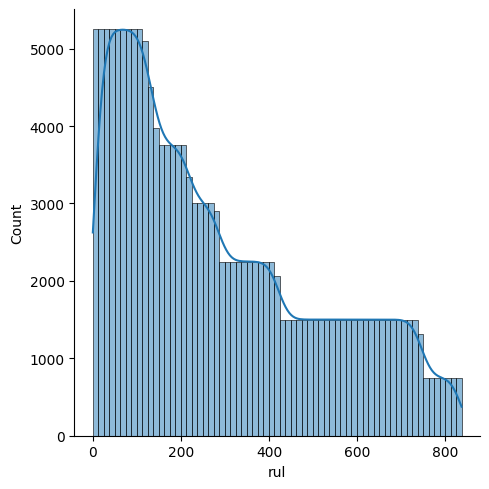

In [ ]:
sns.displot(df['rul'],kde=True)

<Axes: xlabel='rul'>

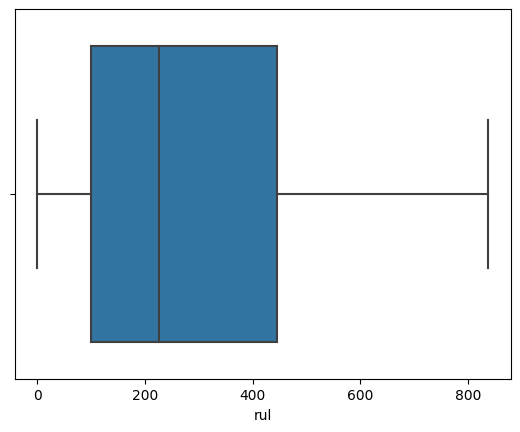

In [ ]:
sns.boxplot(x=df["rul"])

<Axes: >

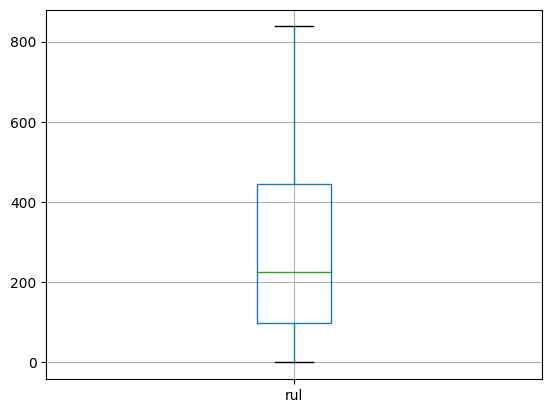

In [ ]:
df.boxplot(column=['rul'])

In [ ]:
df['rul'].describe()

count    166441.000000
mean        288.629396
std         225.739648
min           0.000000
25%          99.066667
50%         226.250000
75%         445.383333
max         837.483333
Name: rul, dtype: float64

In [ ]:
df.describe().T.round(0)

count   mean    std   min    25%     50%     75%     max
sensor_00  166441.0    2.0    0.0   0.0    2.0     2.0     2.0     3.0
sensor_01  166441.0   47.0    3.0  22.0   46.0    48.0    49.0    56.0
sensor_02  166441.0   51.0    4.0  33.0   50.0    52.0    53.0    56.0
sensor_03  166441.0   43.0    3.0  32.0   42.0    44.0    45.0    48.0
sensor_04  166441.0  578.0  162.0   3.0  625.0   632.0   637.0   800.0
sensor_05  166441.0   74.0   19.0   0.0   72.0    77.0    82.0   100.0
sensor_06  166441.0   13.0    2.0   0.0   13.0    14.0    14.0    22.0
sensor_07  166441.0   16.0    2.0   0.0   16.0    16.0    16.0    24.0
sensor_08  166441.0   15.0    2.0   0.0   15.0    15.0    16.0    24.0
sensor_09  166441.0   15.0    2.0   0.0   15.0    15.0    15.0    25.0
sensor_10  166441.0   40.0   13.0   0.0   40.0    44.0    47.0    76.0
sensor_11  166441.0   39.0   14.0   0.0   37.0    43.0    48.0    60.0
sensor_12  166441.0   28.0   11.0   0.0   27.0    32.0    34.0    45.0
sensor_13  166441.0    5.0    6.0   0.0    1.0     2.0     5.0    31.0
sensor_14  166441.0  364.0  127.0  32.0  409.0   420.0   421.0   500.0
sensor_16  166441.0  402.0  141.0   0.0  451.0   463.0   464.0   740.0
sensor_17  166441.0  408.0  146.0   0.0  450.0   461.0   467.0   600.0
sensor_18  166441.0    2.0    1.0   0.0    2.0     3.0     3.0     5.0
sensor_19  166441.0  568.0  223.0   0.0  651.0   665.0   667.0   879.0
sensor_20  166441.0  349.0  114.0   0.0  390.0   399.0   400.0   449.0
sensor_21  166441.0  771.0  253.0  96.0  861.0   879.0   882.0  1108.0
sensor_22  166441.0  437.0  170.0   0.0  460.0   504.0   533.0   594.0
sensor_23  166441.0  870.0  316.0   0.0  947.0   979.0  1001.0  1156.0
sensor_24  166441.0  536.0  204.0   0.0  599.0   624.0   628.0  1000.0
sensor_25  166441.0  625.0  247.0   0.0  654.0   741.0   751.0   840.0
sensor_26  166441.0  760.0  272.0  43.0  752.0   867.0   903.0  1214.0
sensor_27  166441.0  477.0  154.0   0.0  442.0   477.0   525.0  2000.0
sensor_28  166441.0  878.0  340.0   4.0  833.0  1000.0  1058.0  1841.0
sensor_29  166441.0  589.0  257.0   1.0  524.0   699.0   768.0  1466.0
sensor_30  166441.0  586.0  215.0   0.0  617.0   652.0   685.0  1600.0
sensor_31  166441.0  854.0  320.0  24.0  831.0   923.0   993.0  1800.0
sensor_32  166441.0  782.0  283.0   0.0  750.0   859.0   923.0  1839.0
sensor_33  166441.0  479.0  171.0   6.0  488.0   517.0   569.0  1579.0
sensor_34  166441.0  225.0   94.0  55.0  166.0   190.0   315.0   426.0
sensor_35  166441.0  391.0  145.0   0.0  333.0   405.0   501.0   694.0
sensor_36  166441.0  532.0  304.0   2.0  209.0   610.0   838.0   984.0
sensor_37  166441.0   75.0   31.0   0.0   54.0    76.0    96.0   175.0
sensor_38  166441.0   49.0   11.0  24.0   45.0    49.0    54.0   409.0
sensor_39  166441.0   37.0   16.0  19.0   33.0    36.0    40.0   548.0
sensor_40  166441.0   65.0   21.0  23.0   56.0    64.0    73.0   513.0
sensor_41  166441.0   36.0    8.0  21.0   33.0    35.0    38.0   219.0
sensor_42  166441.0   36.0   11.0  22.0   33.0    35.0    38.0   374.0
sensor_43  166441.0   43.0   12.0  24.0   39.0    42.0    46.0   409.0
sensor_44  166441.0   40.0    9.0  26.0   36.0    39.0    43.0   291.0
sensor_45  166441.0   41.0   10.0  26.0   36.0    39.0    43.0   231.0
sensor_46  166441.0   45.0   14.0  26.0   39.0    43.0    48.0   321.0
sensor_47  166441.0   43.0    9.0  27.0   39.0    42.0    46.0   220.0
sensor_48  166441.0  122.0   64.0  26.0   73.0   110.0   163.0   502.0
sensor_49  166441.0   53.0   14.0  27.0   47.0    51.0    56.0   459.0
sensor_51  166441.0  202.0  120.0  28.0  178.0   198.0   211.0  1000.0
rul        166441.0  289.0  226.0   0.0   99.0   226.0   445.0   837.0

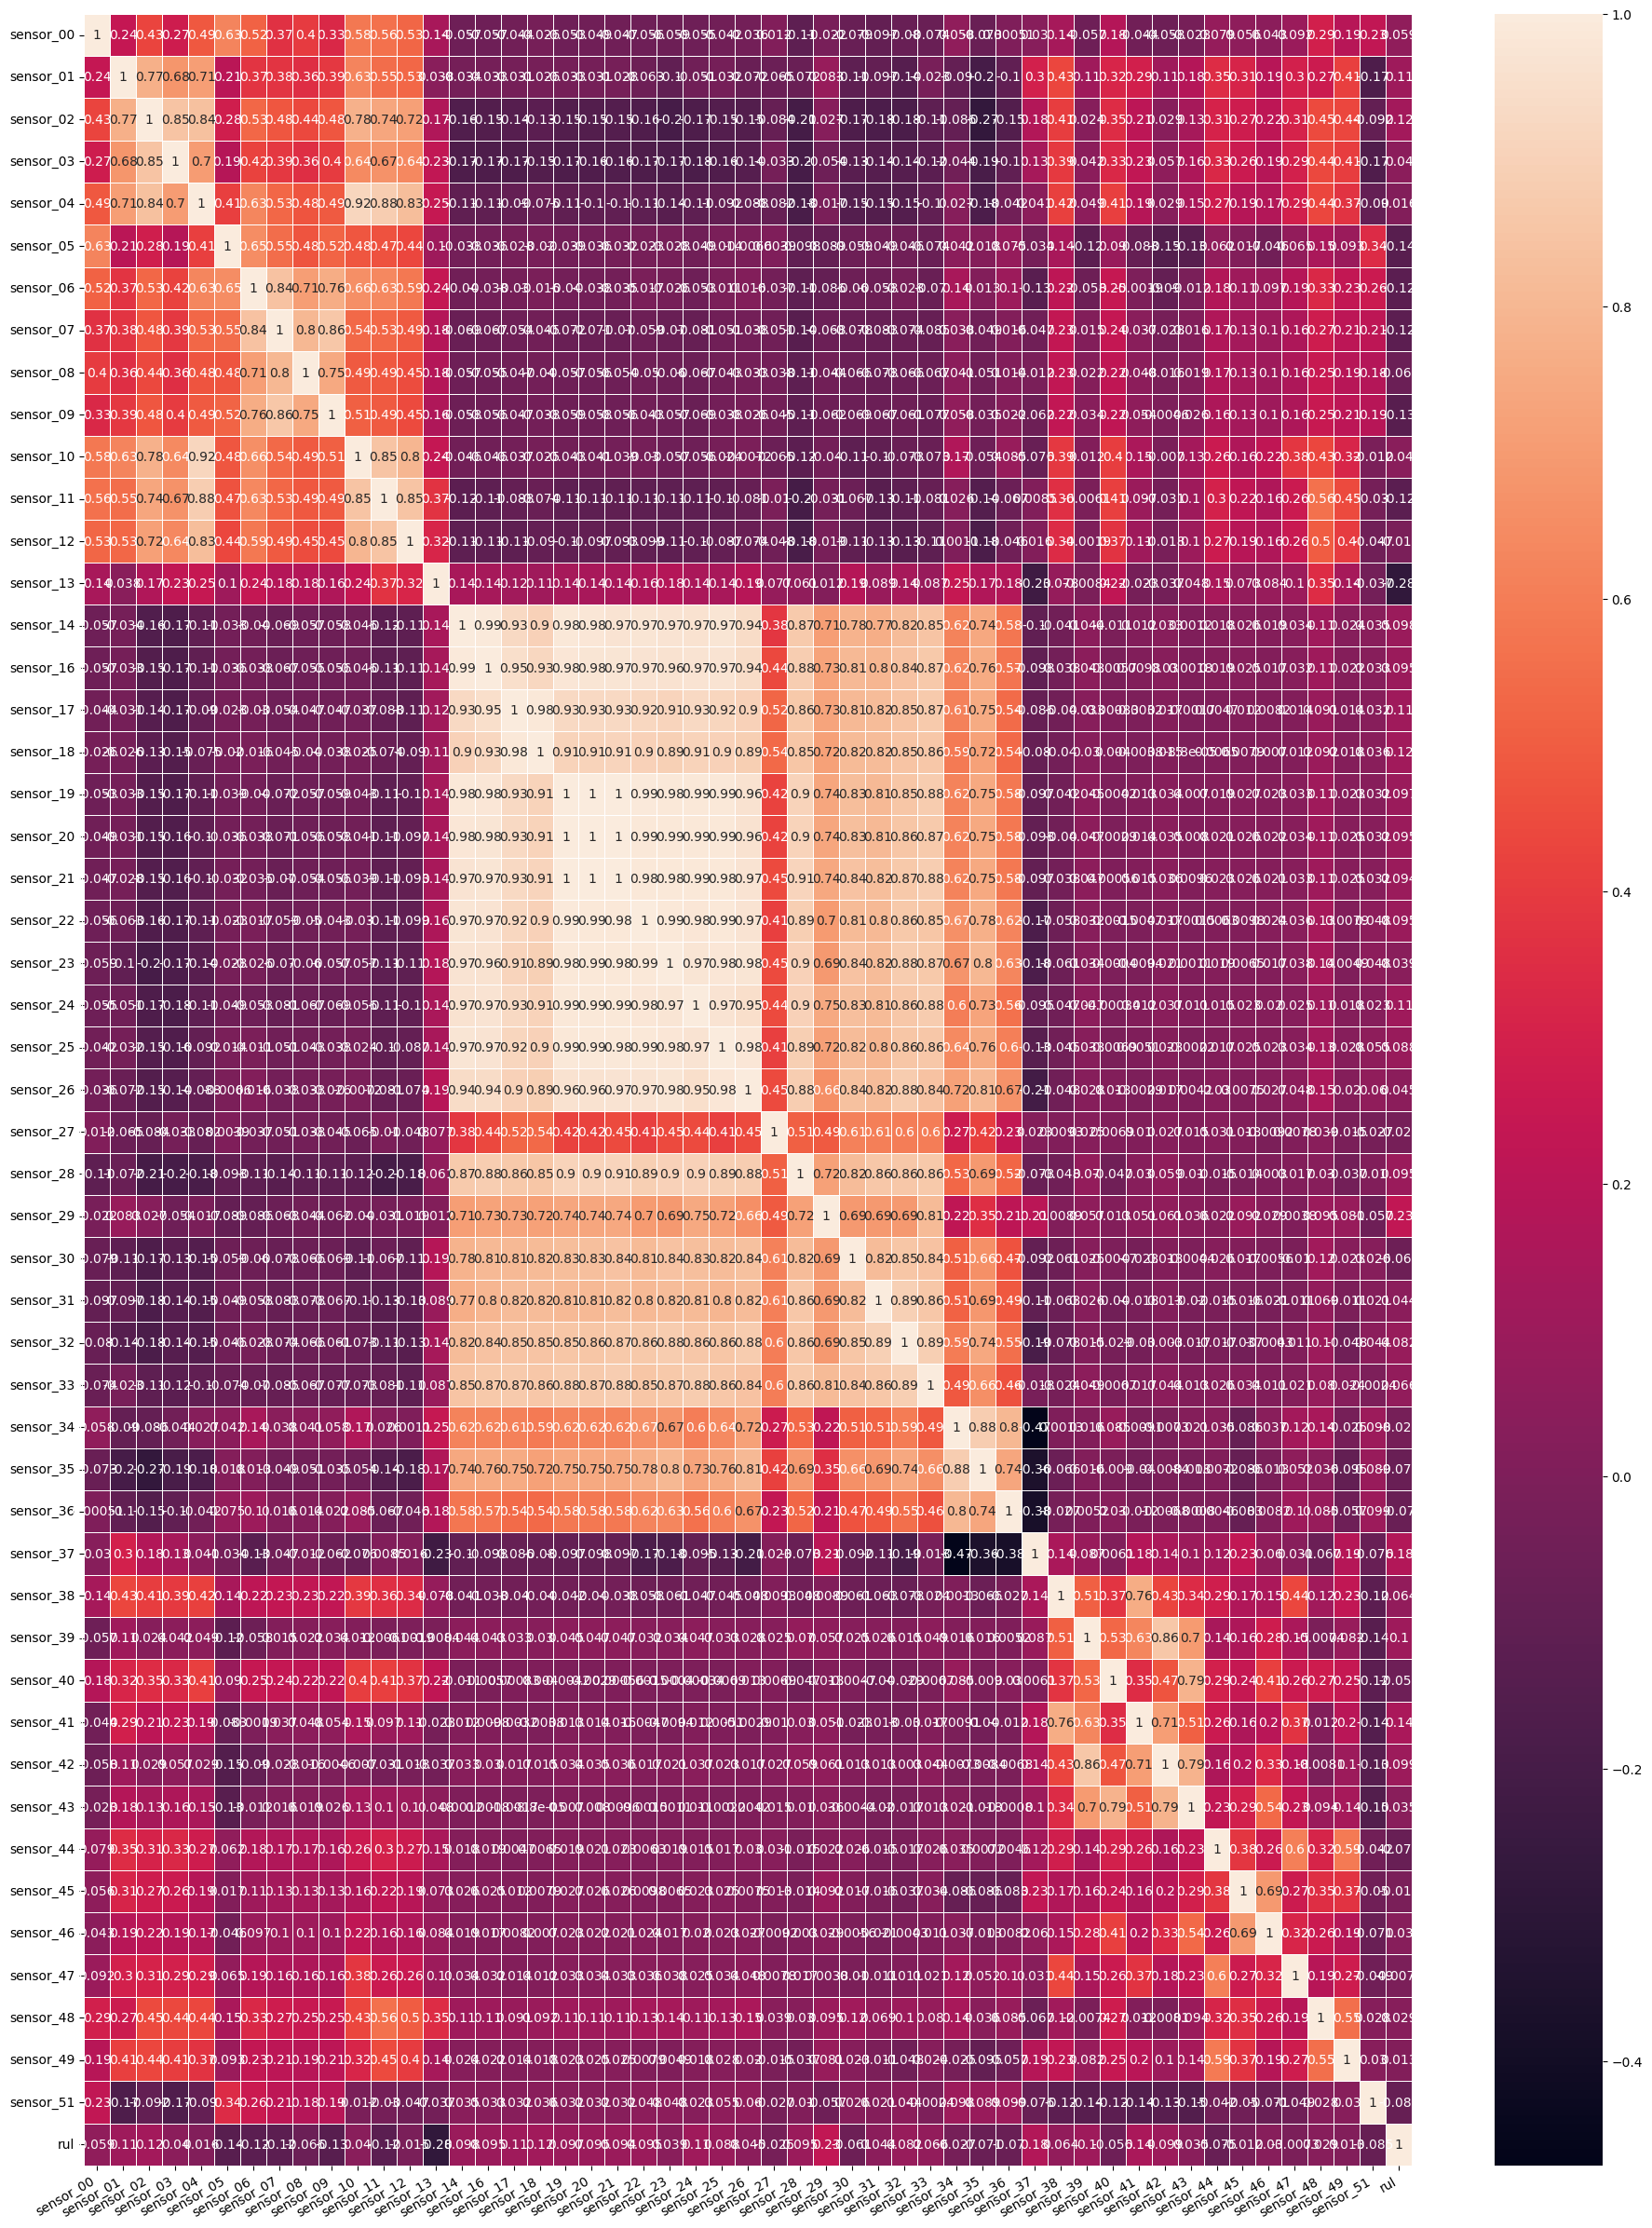

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(23, 30))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

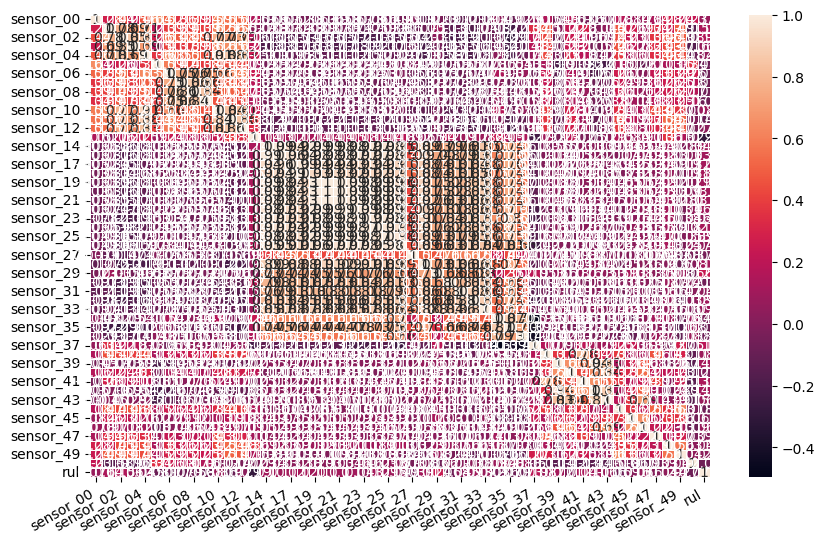

In [ ]:
corrmat = df.sample(n=2000).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

# This is to display numerical Column Counts

```
num_col = df._get_numeric_data().columns
for i in num_col:
   if i in ['source']:
     continue
   plt.figure(figsize=(10, 5))
   chart = sns.countplot(
             data=df,
             x=i,
             palette='Set1',
# This option plot top category of numerical values.
             order=pd.value_counts(df[i]).iloc[:10].index
           )
   chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
   plt.show()
```



# This is to display the outliers

```
num_col = df._get_numeric_data().columns
describe_num_df = df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.catplot(x='index', y=i, data=describe_num_df)
  plt.show()

```



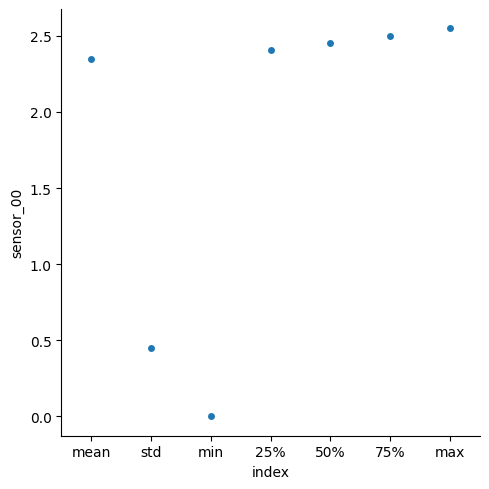

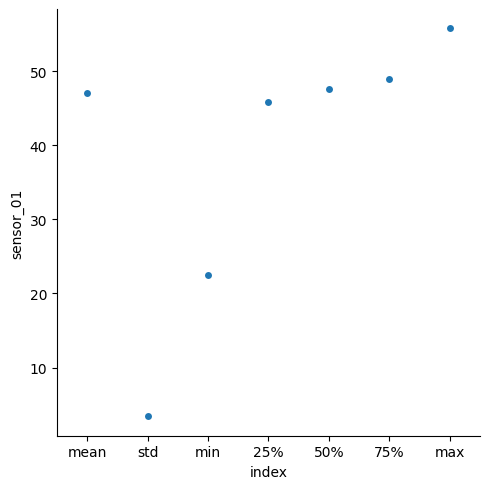

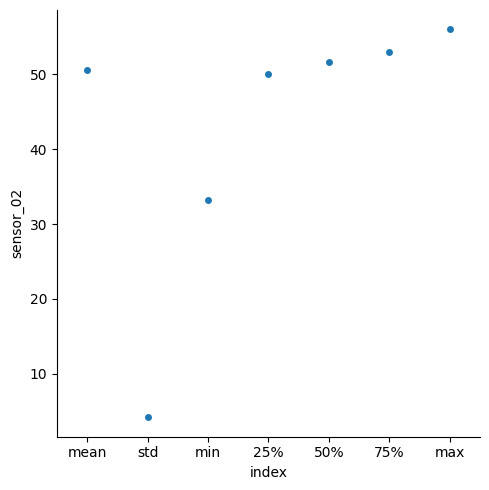

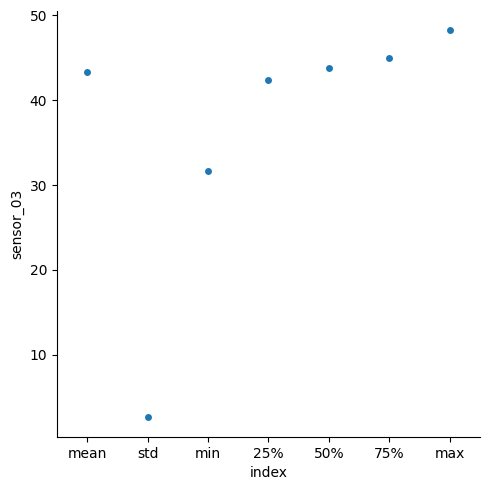

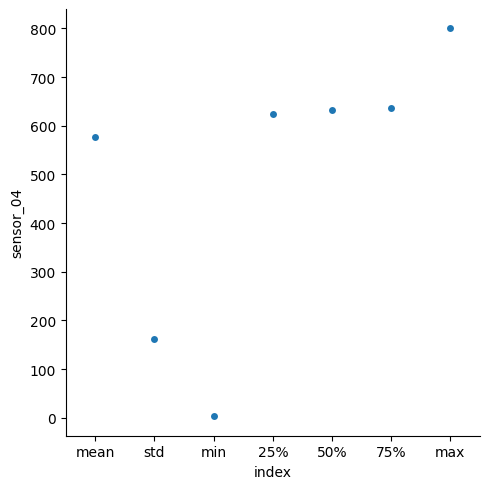

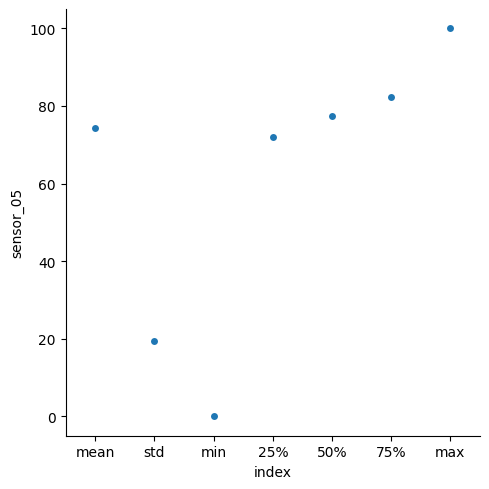

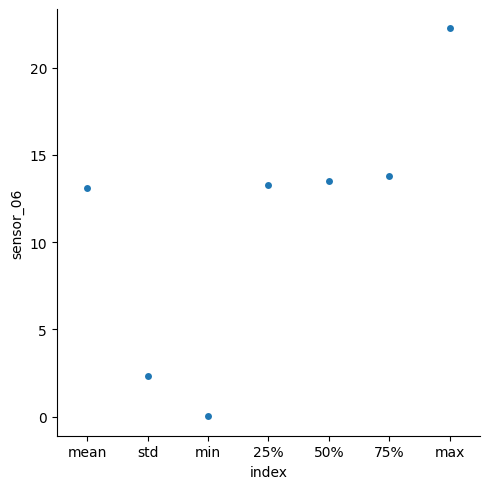

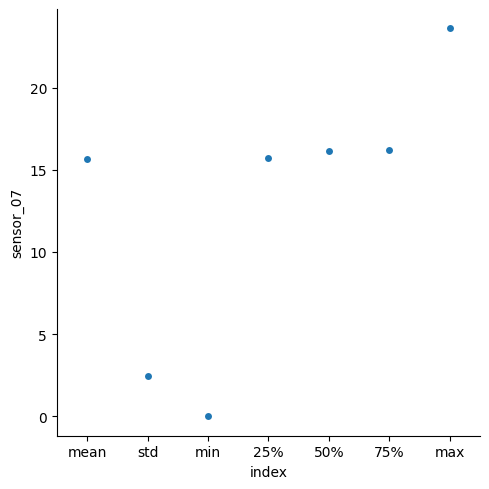

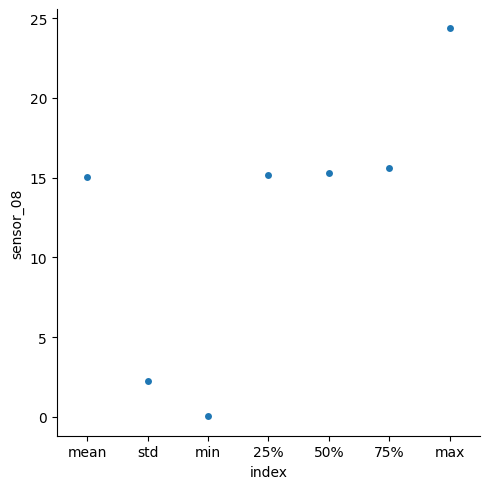

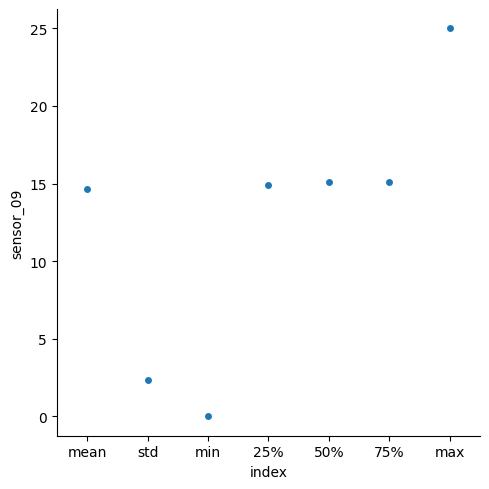

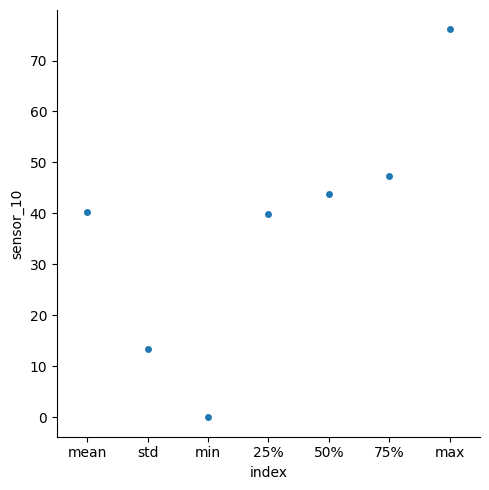

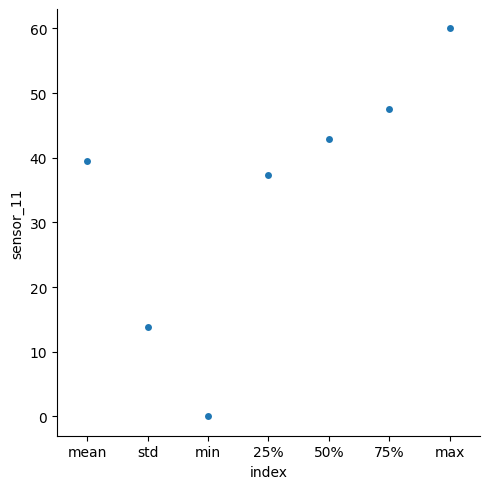

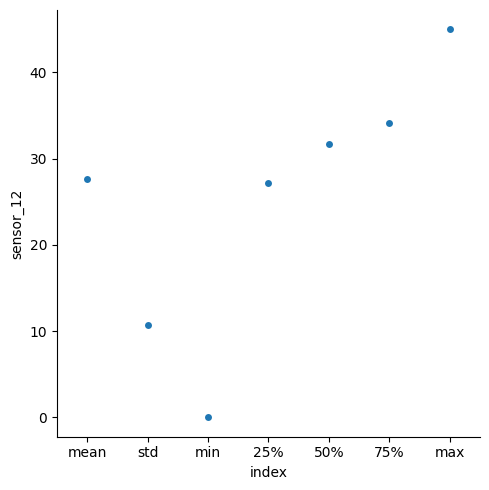

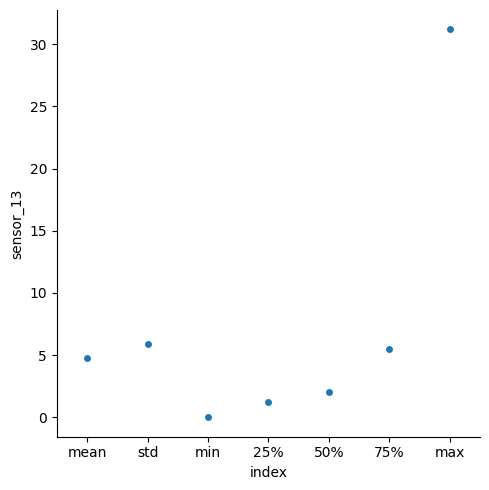

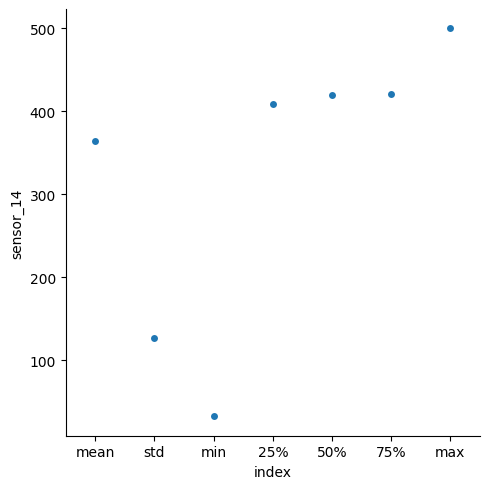

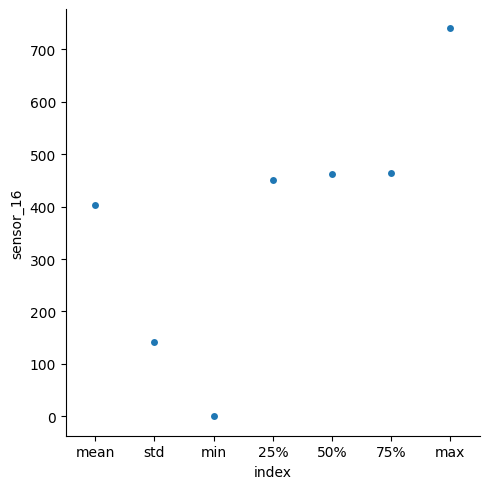

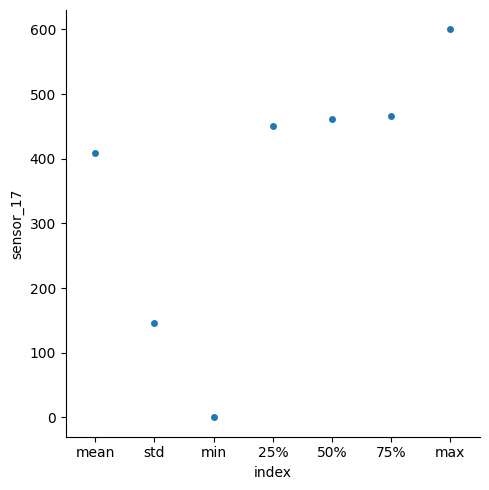

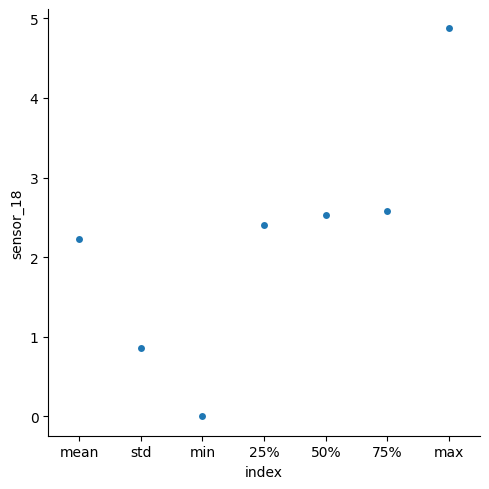

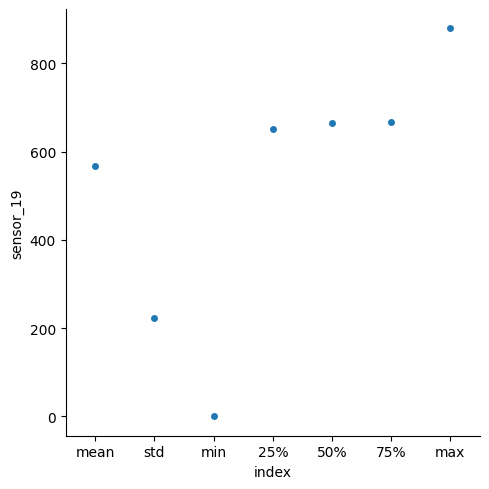

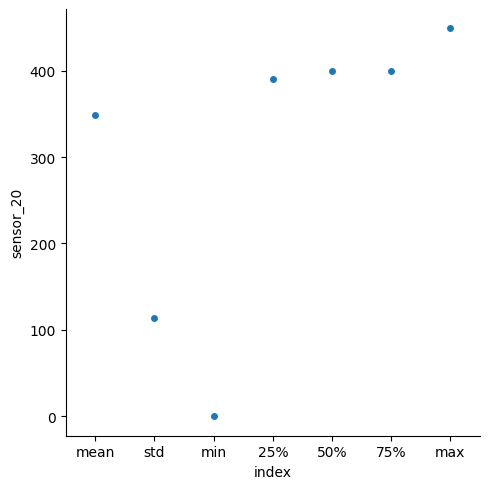

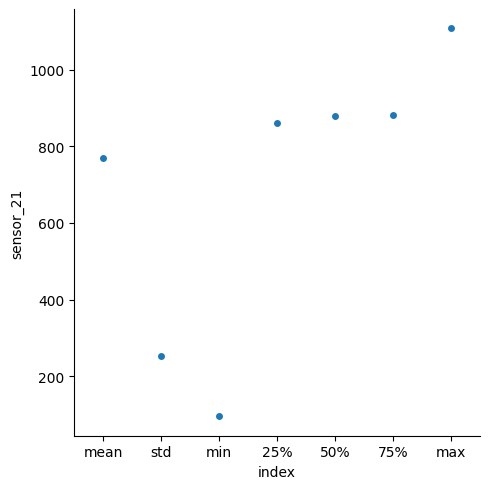

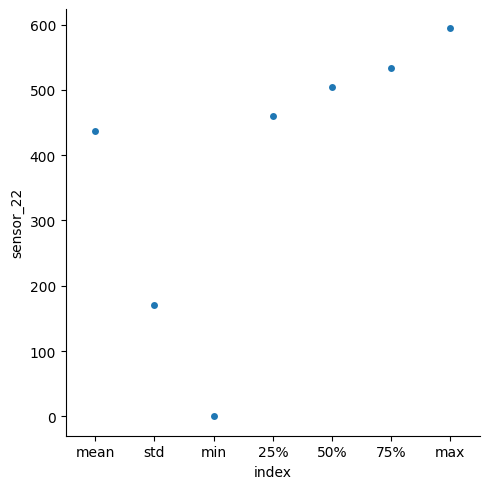

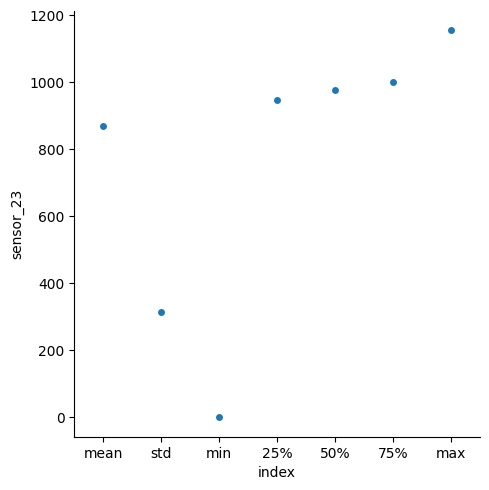

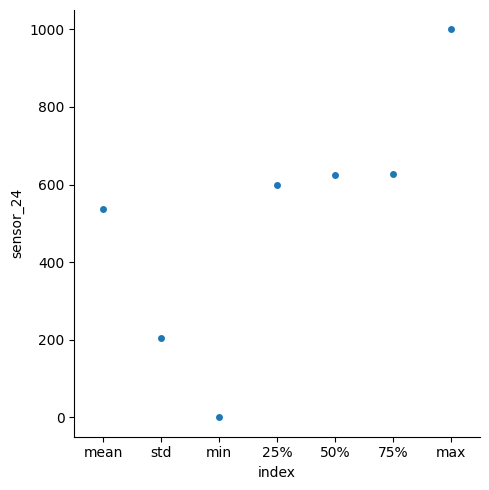

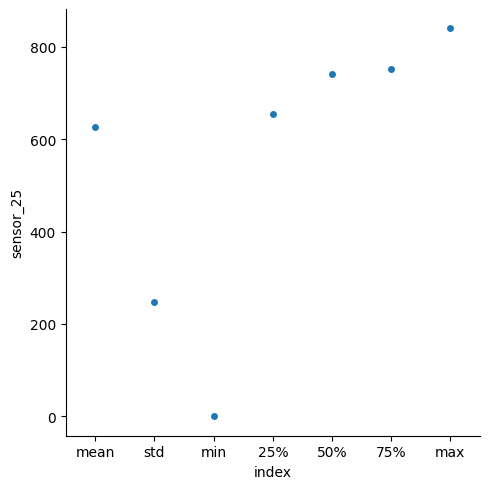

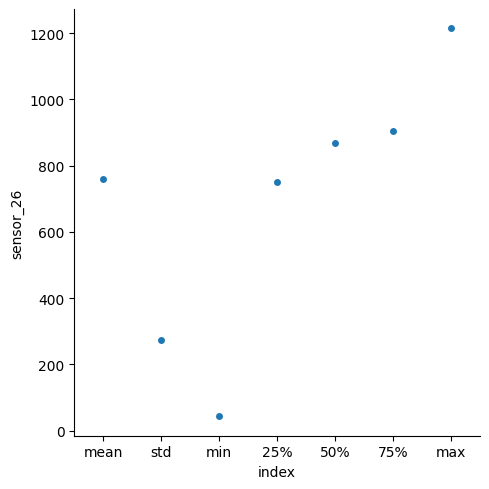

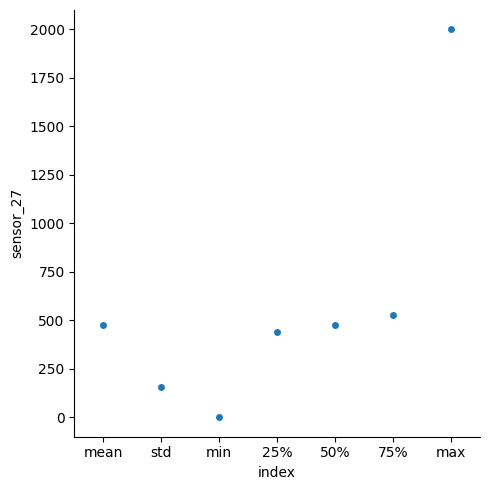

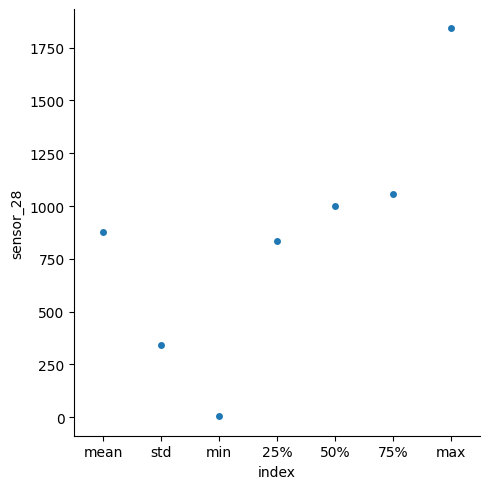

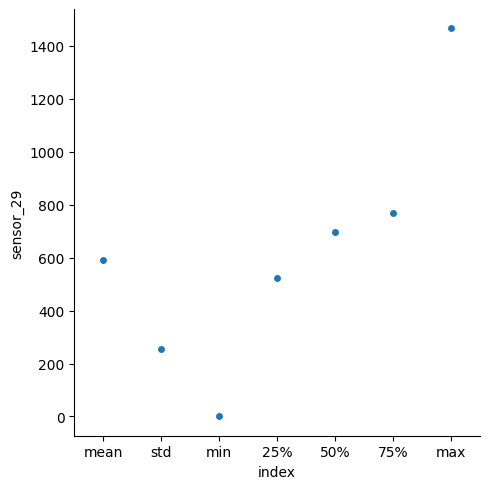

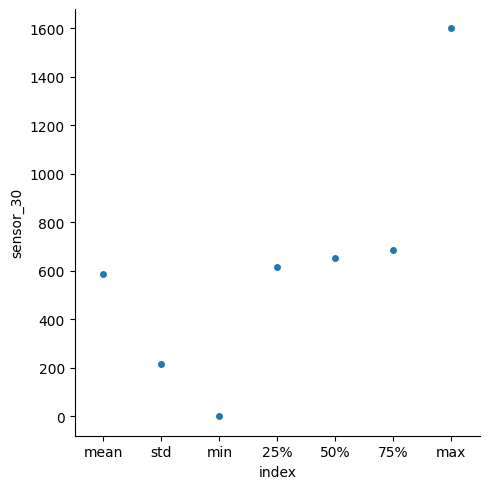

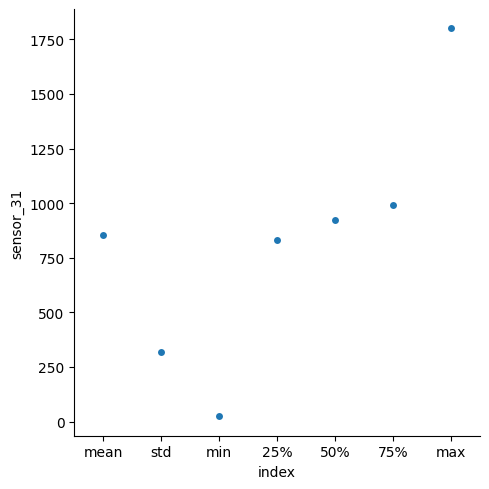

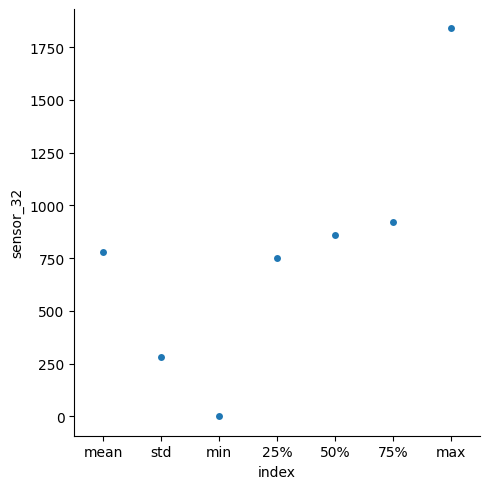

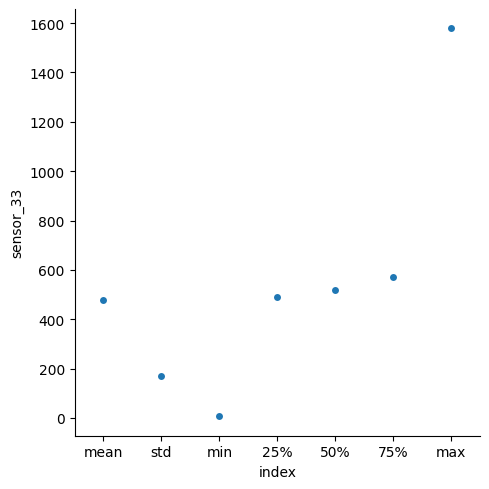

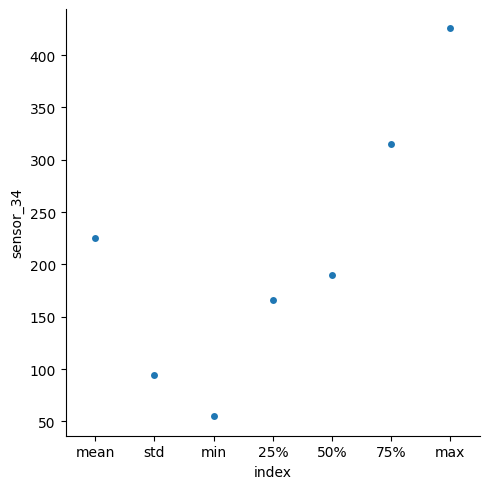

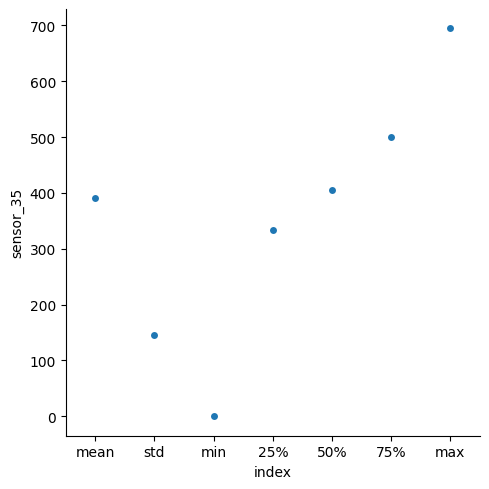

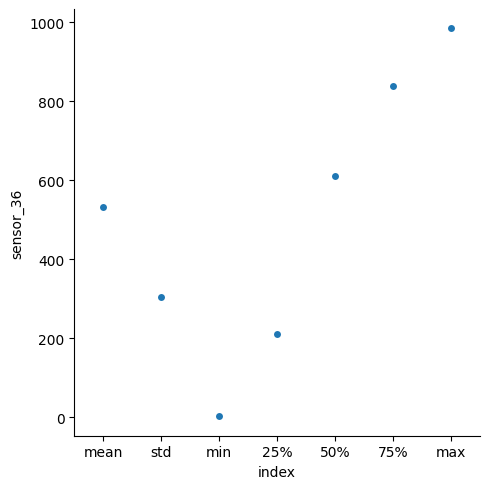

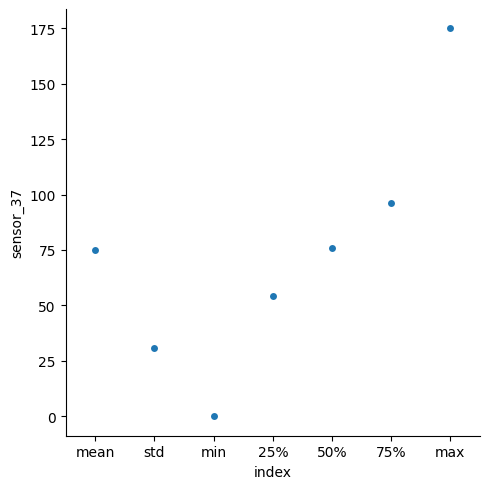

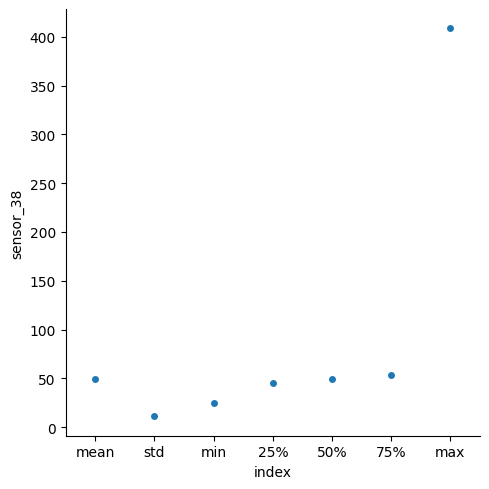

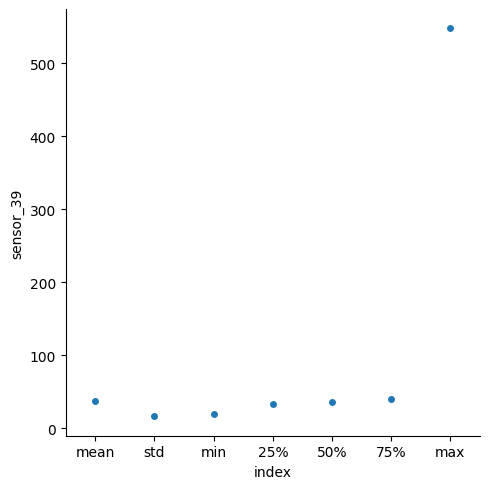

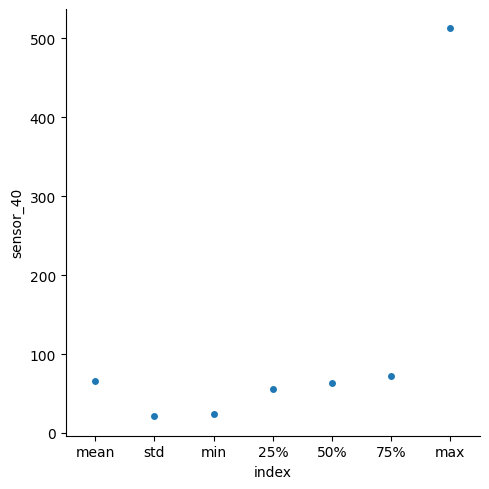

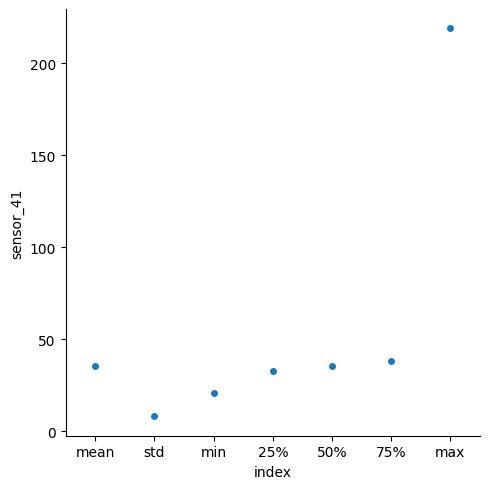

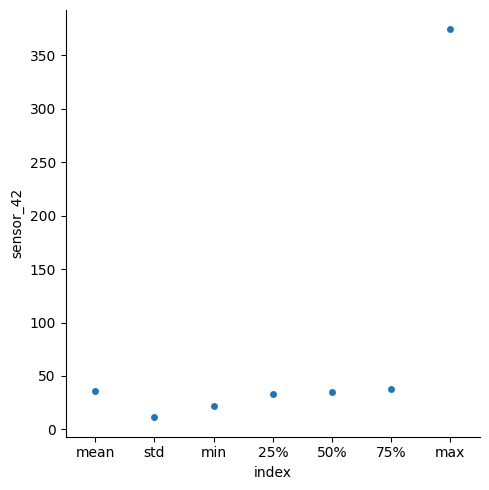

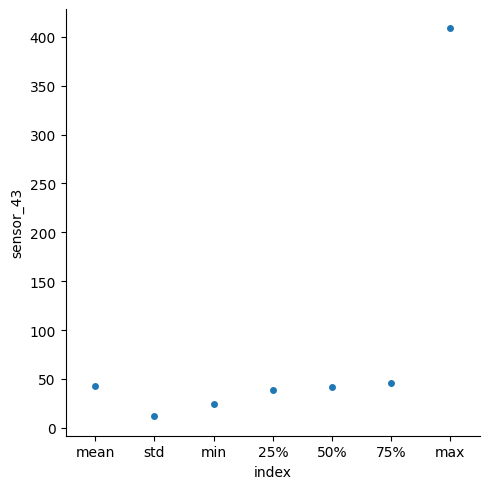

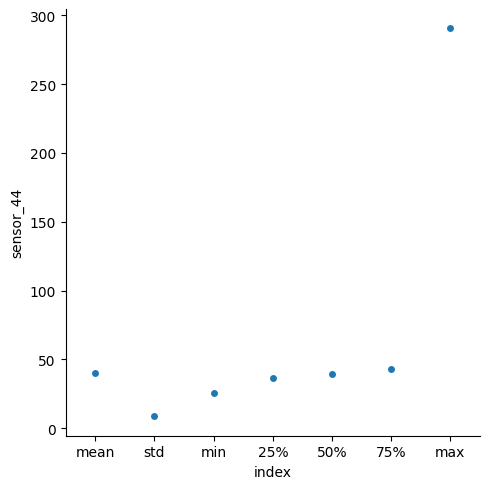

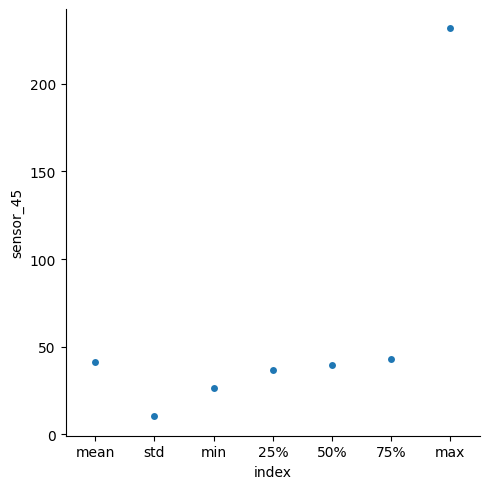

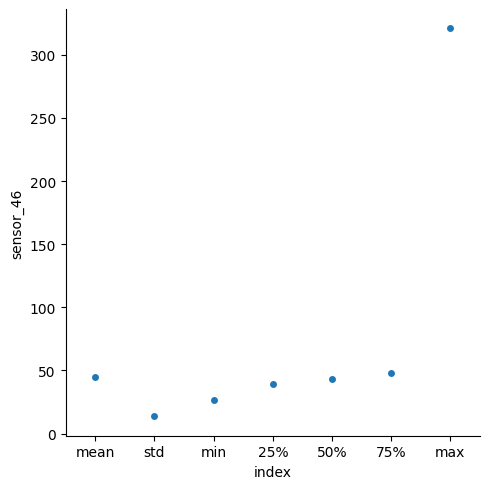

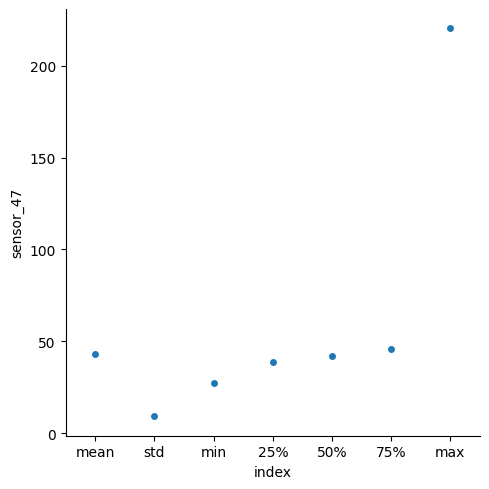

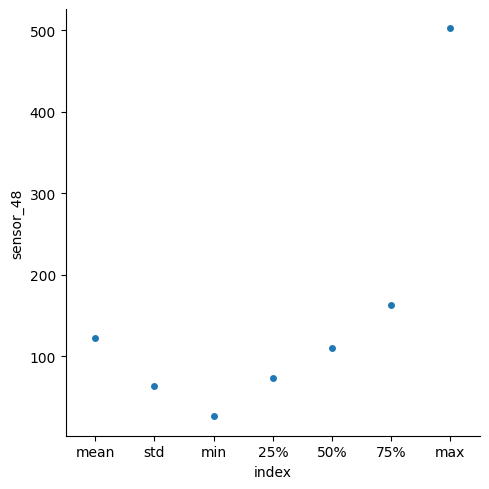

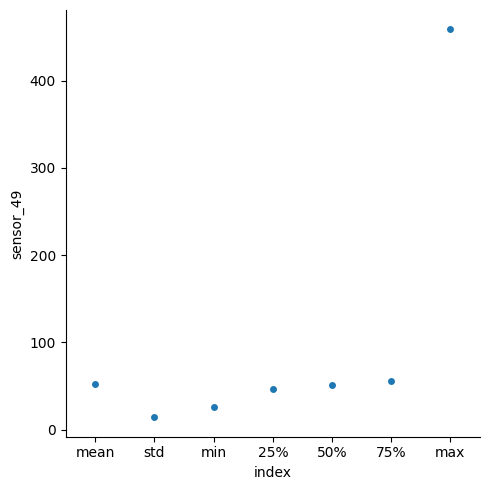

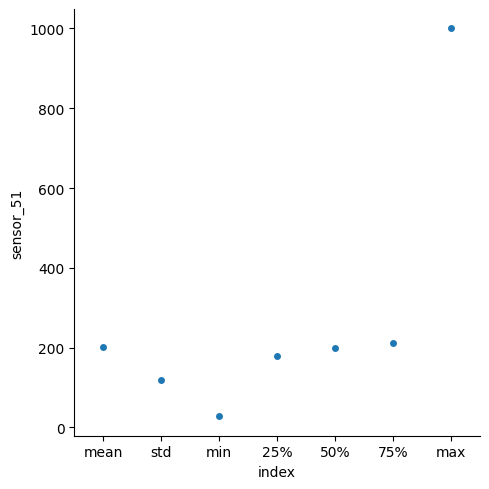

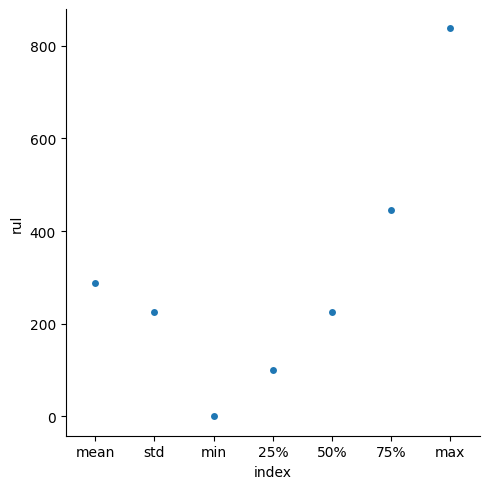

In [ ]:
num_col = df._get_numeric_data().columns
describe_num_df = df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:
  if i in ['index']:
    continue
  sns.catplot(x='index', y=i, data=describe_num_df)
  plt.show()

# This code is to display numeric_data count

```
num_col = df._get_numeric_data().columns
for i in num_col:
   if i in ['source']:
     continue
   plt.figure(figsize=(10, 5))
   chart = sns.countplot(
             data=df,
             x=i,
             palette='Set1',
# This option plot top category of numerical values.
             order=pd.value_counts(df[i]).iloc[:10].index
           )
   chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
   plt.show()
```



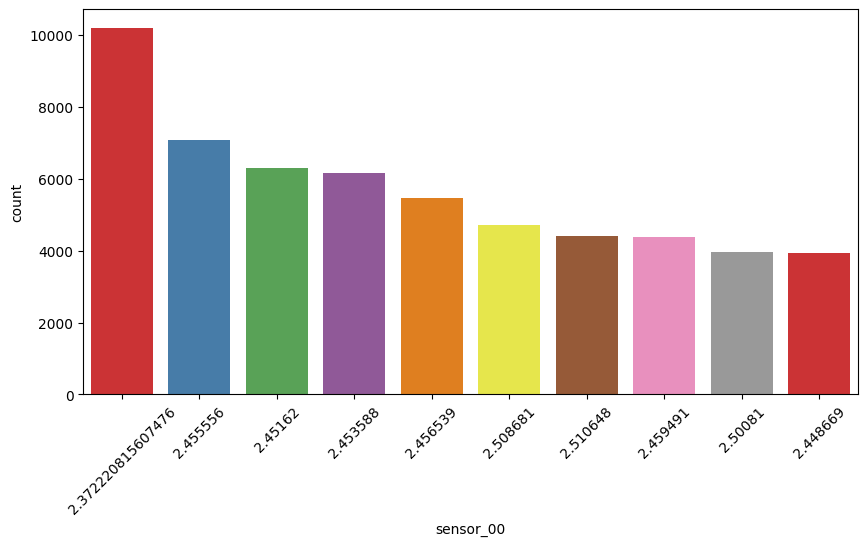

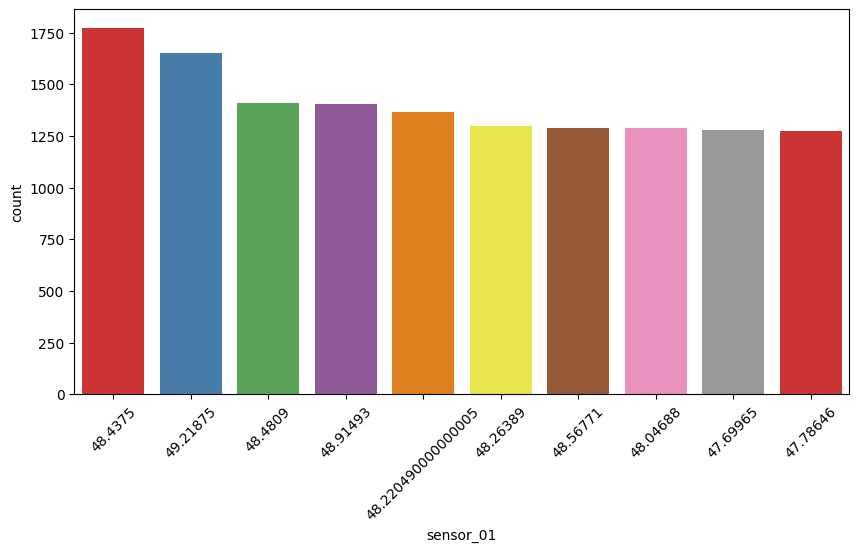

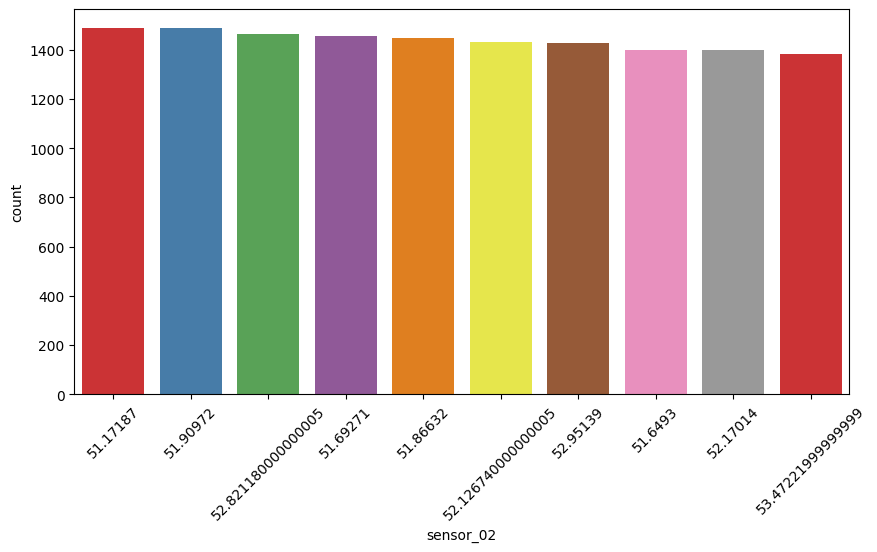

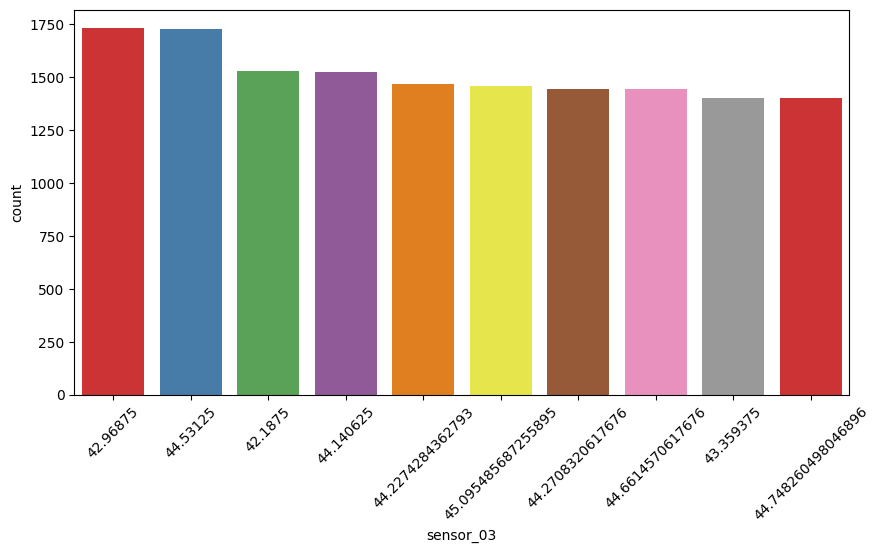

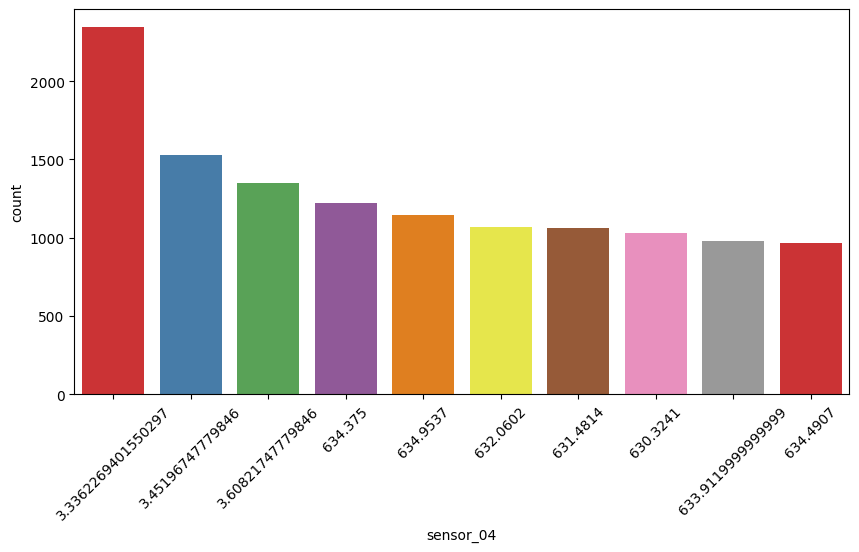

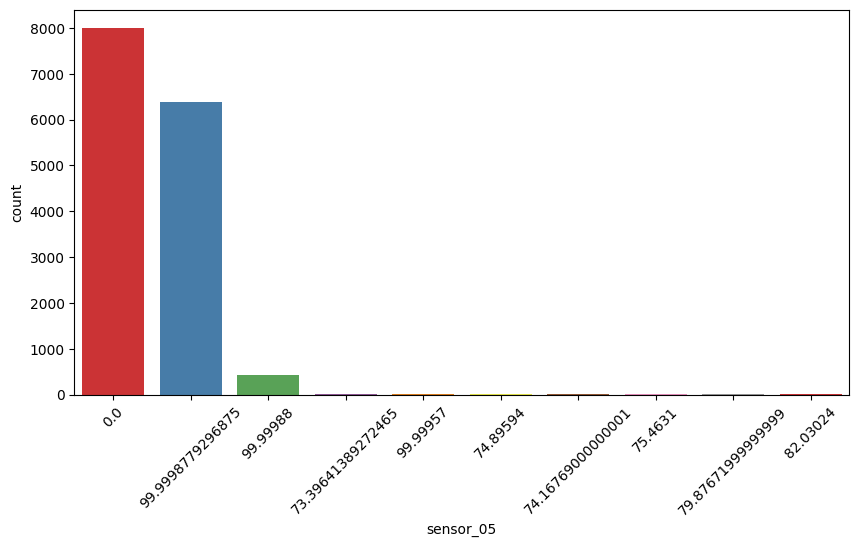

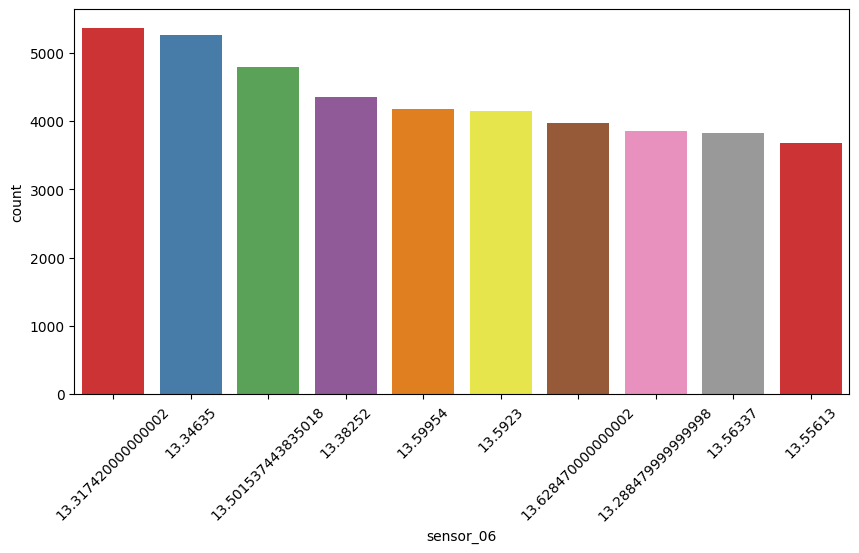

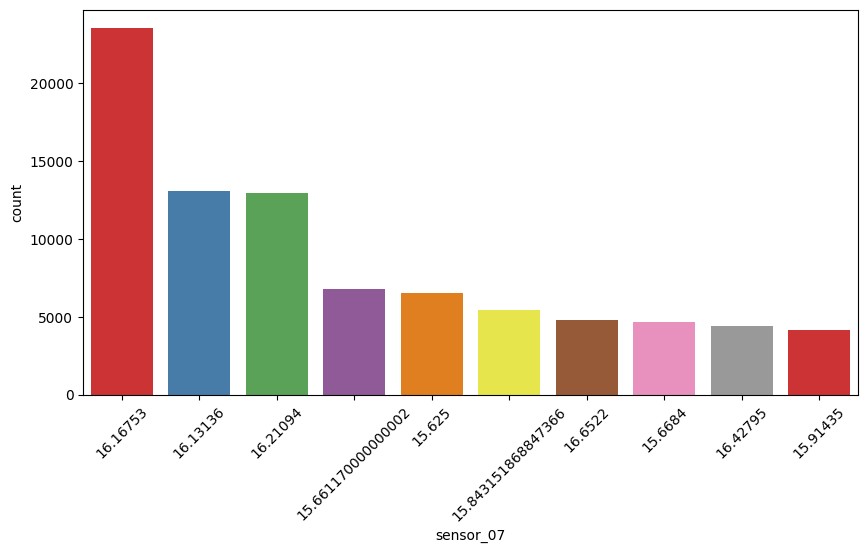

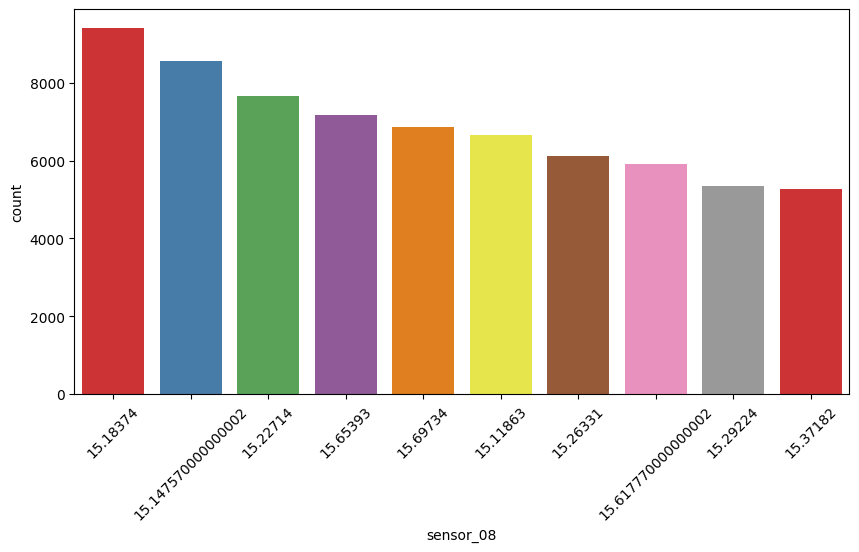

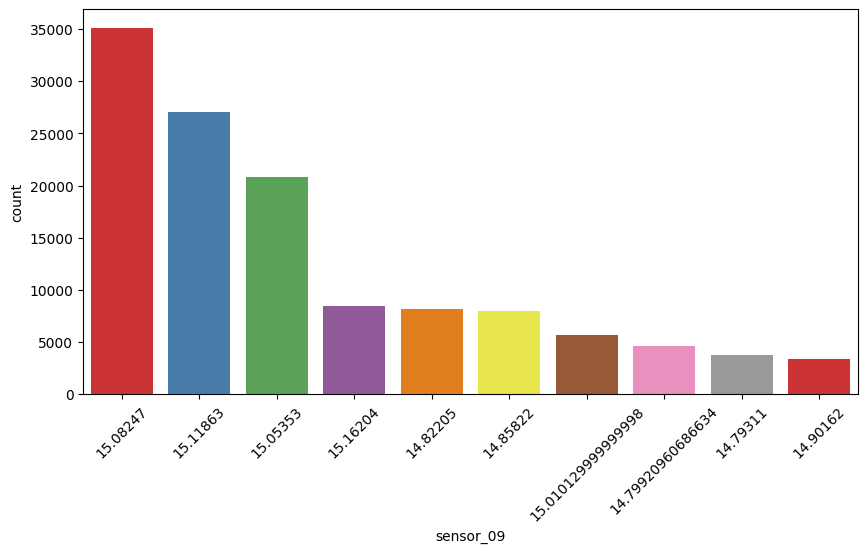

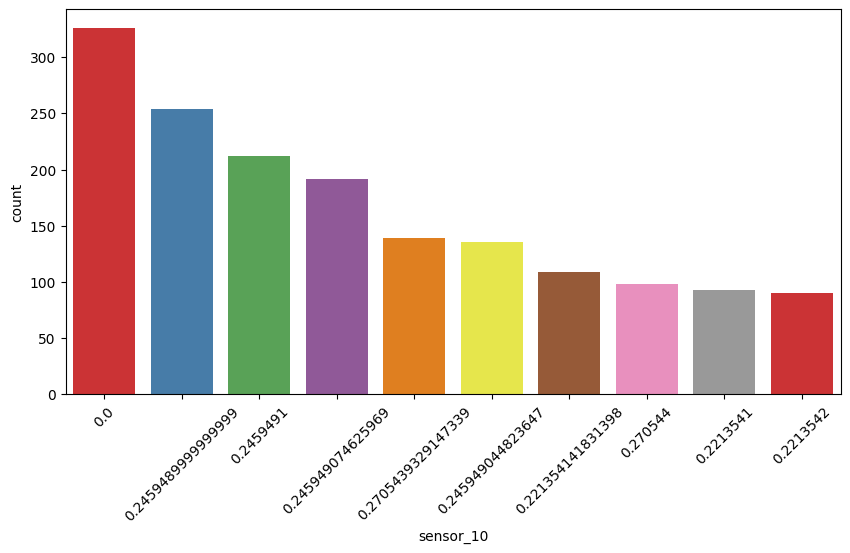

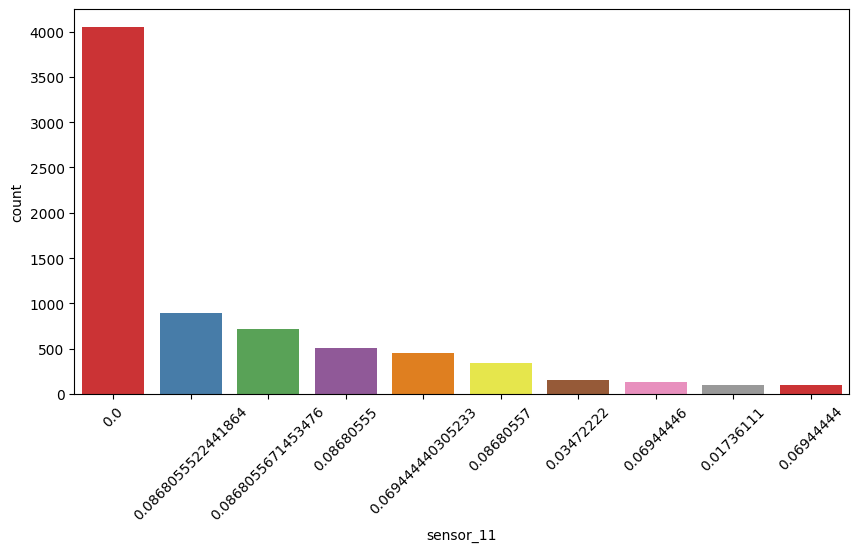

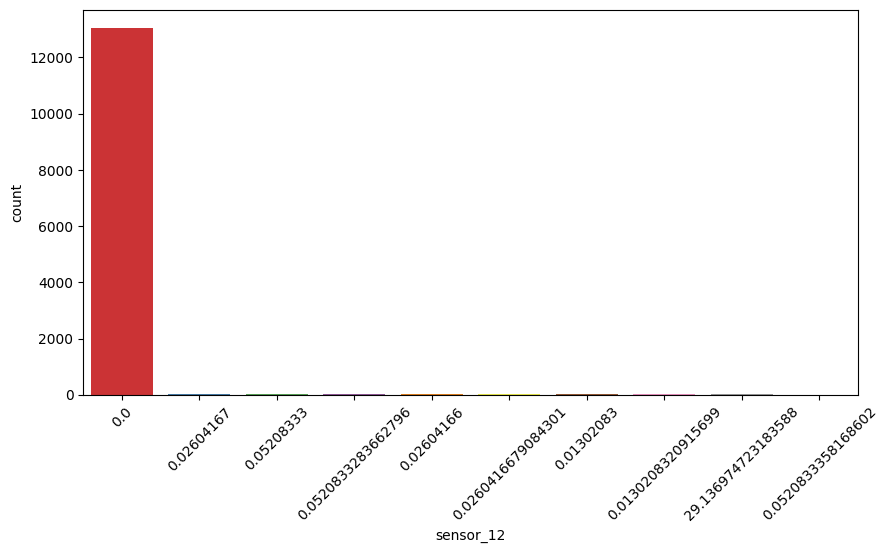

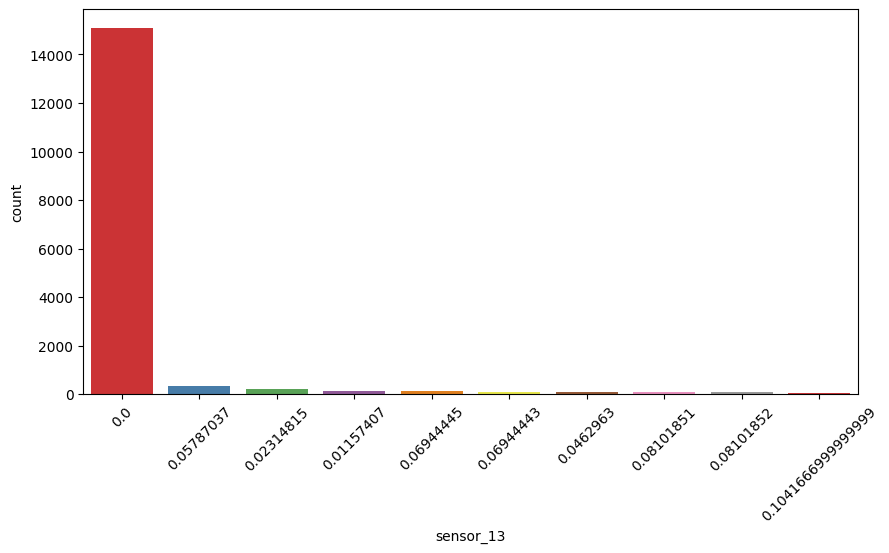

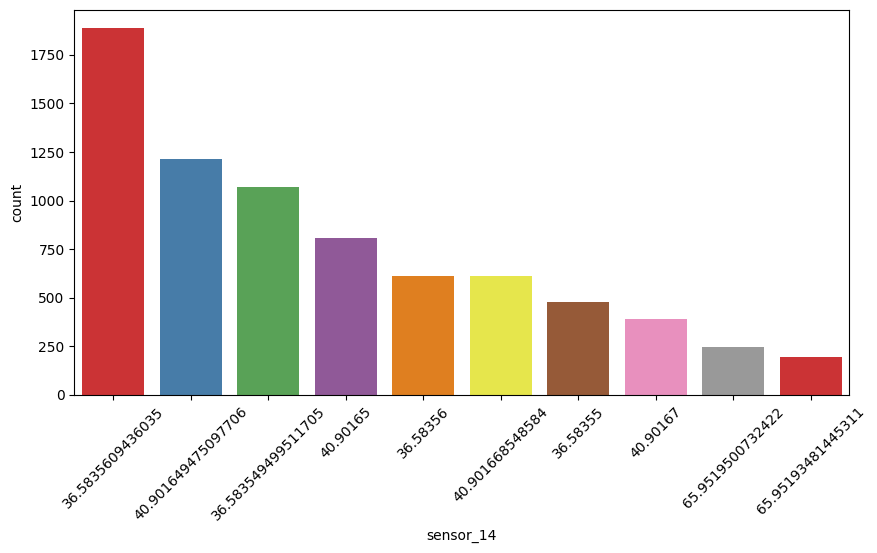

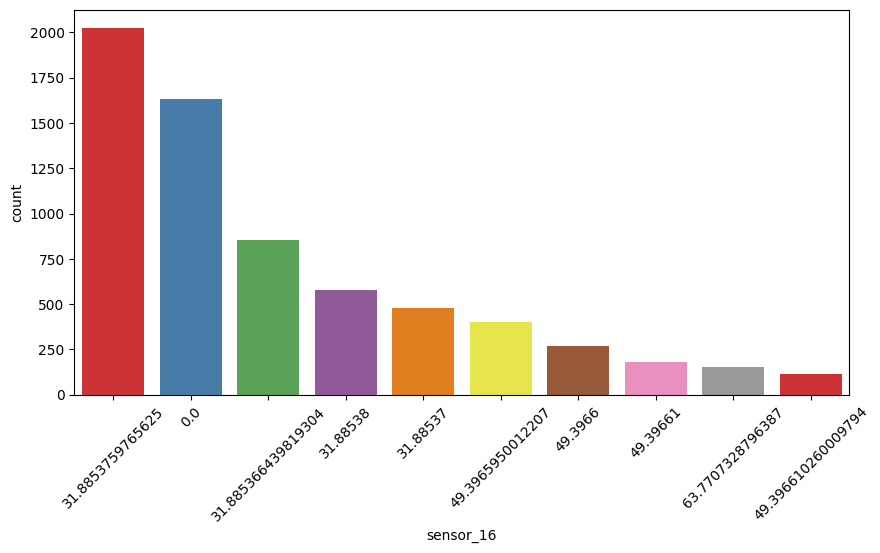

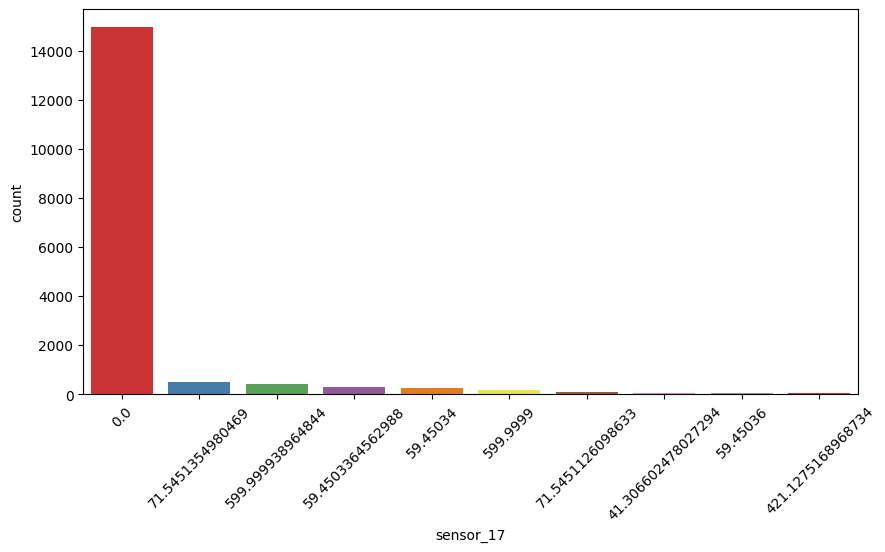

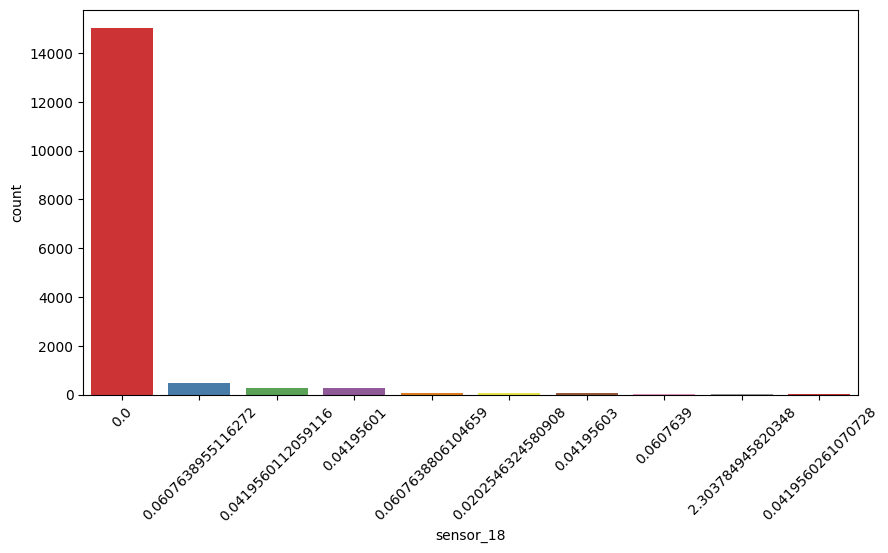

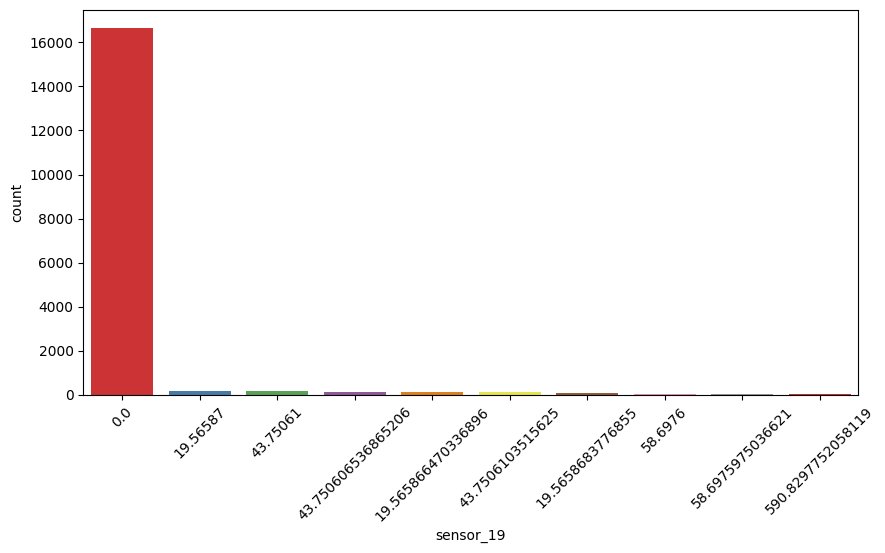

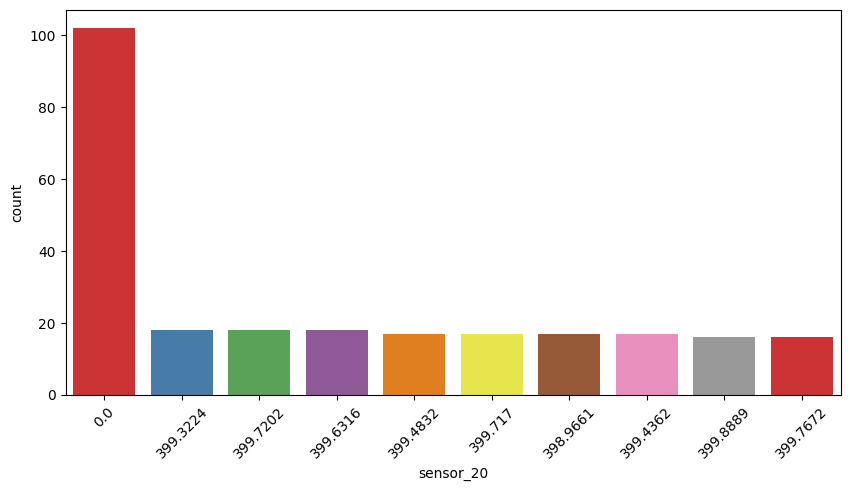

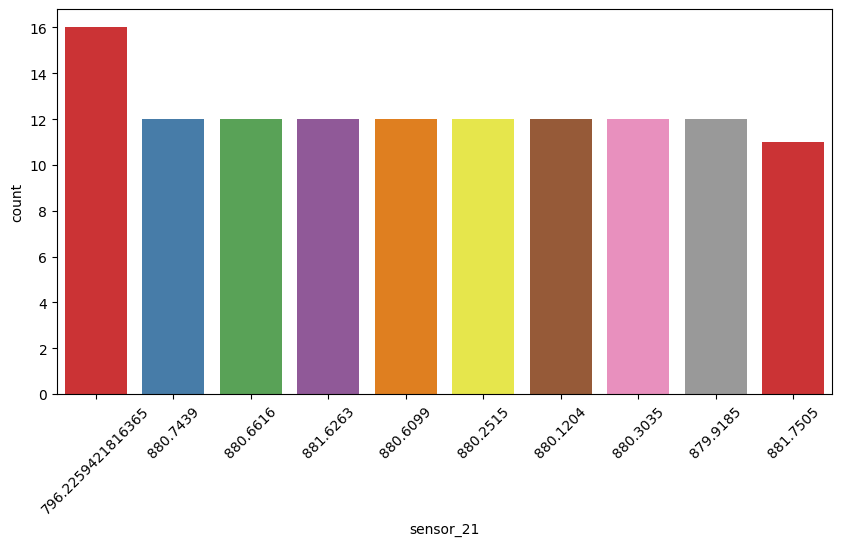

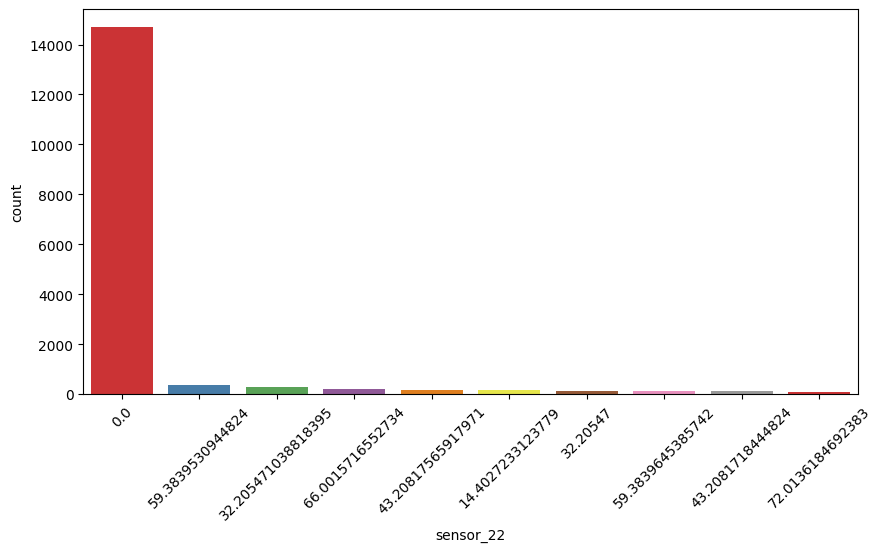

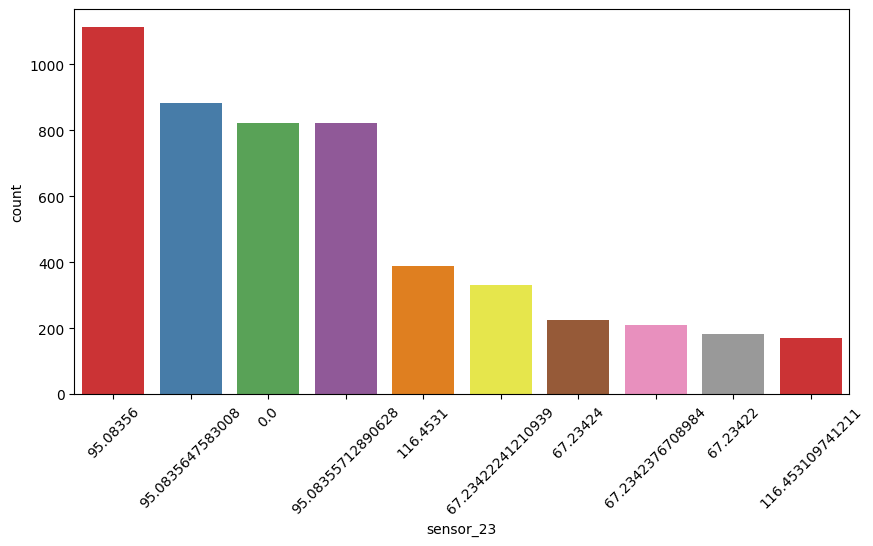

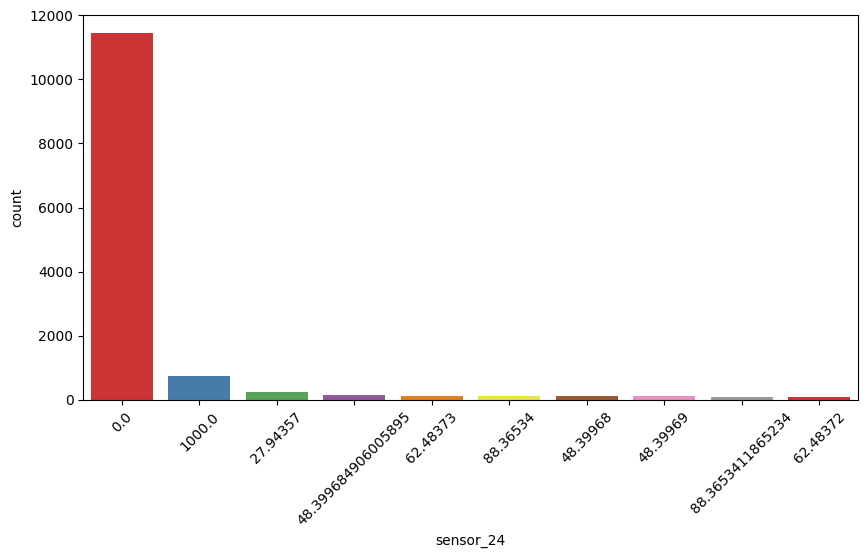

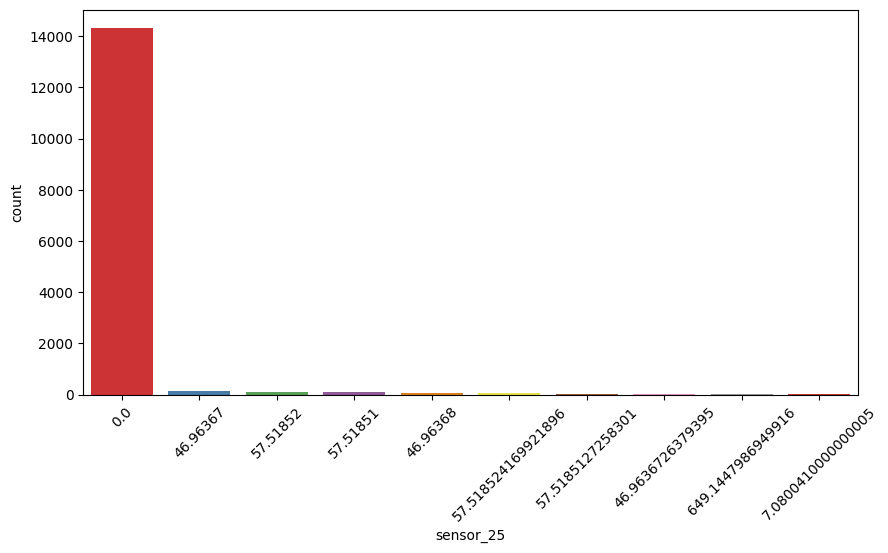

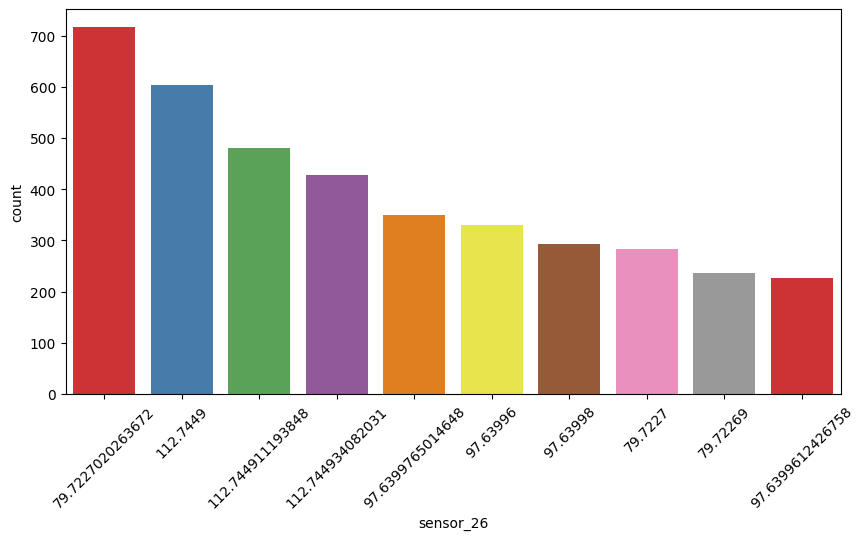

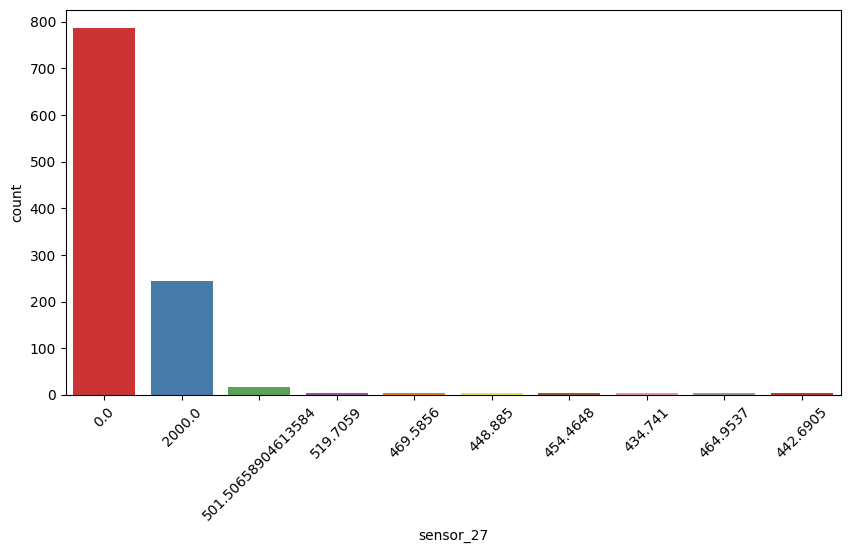

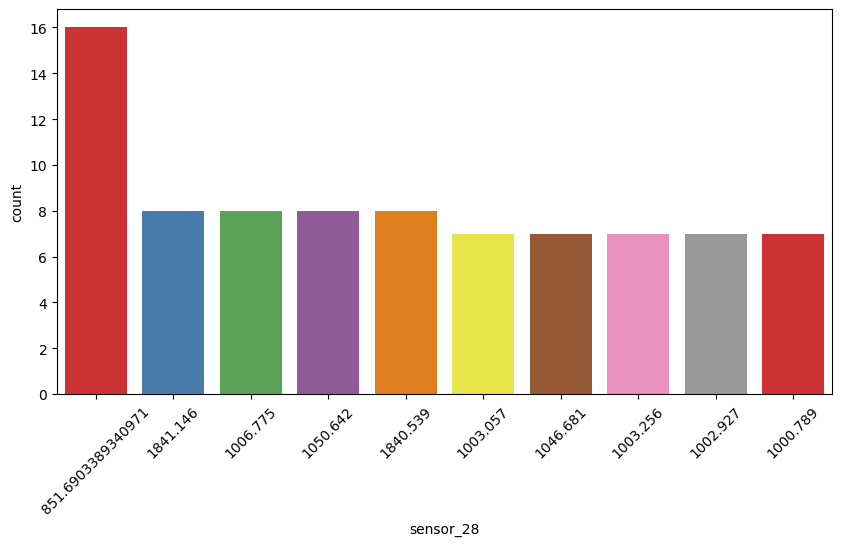

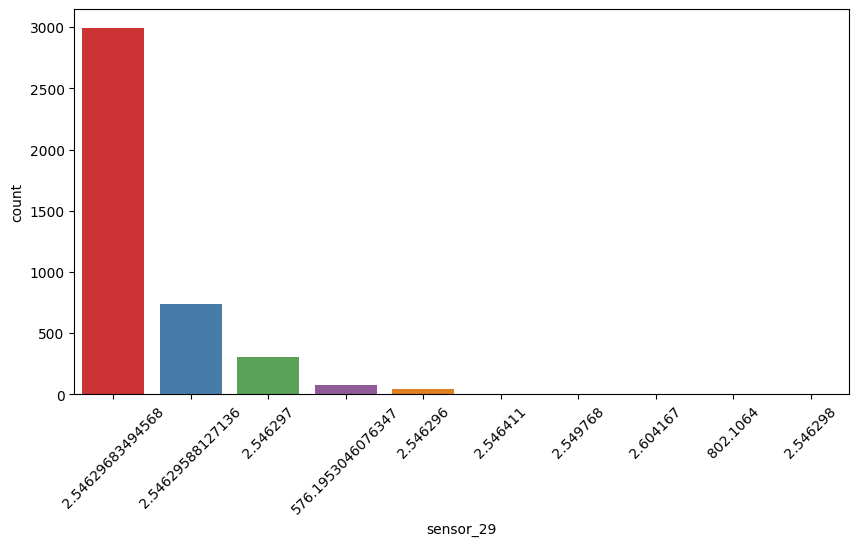

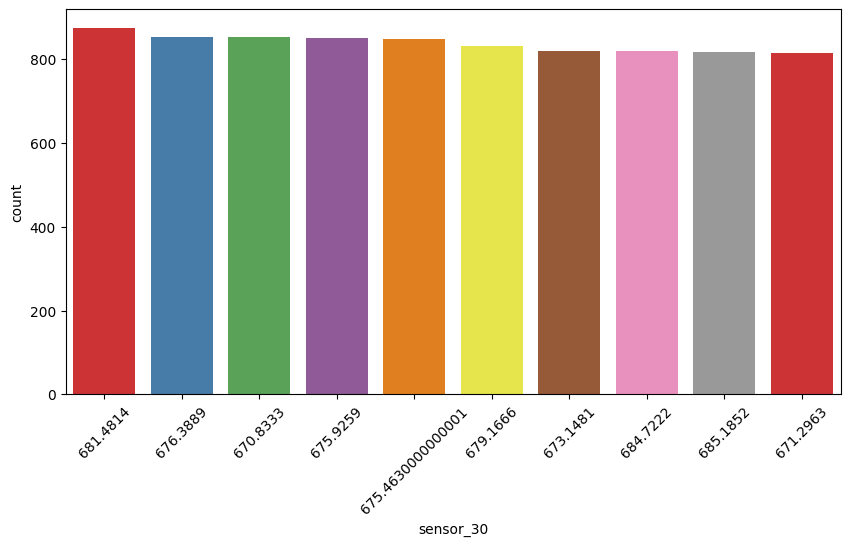

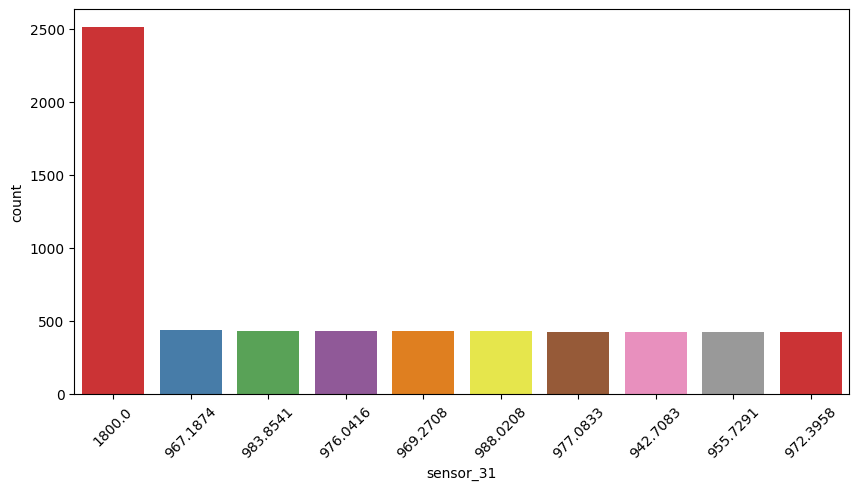

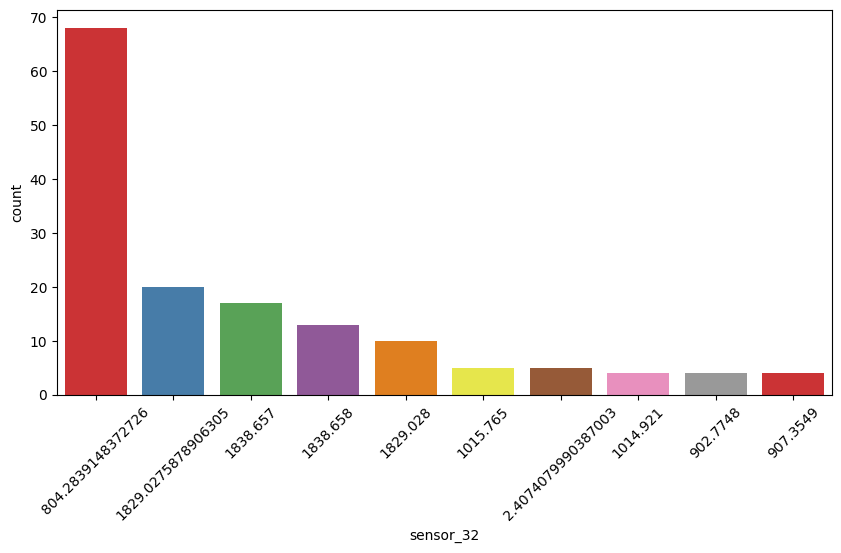

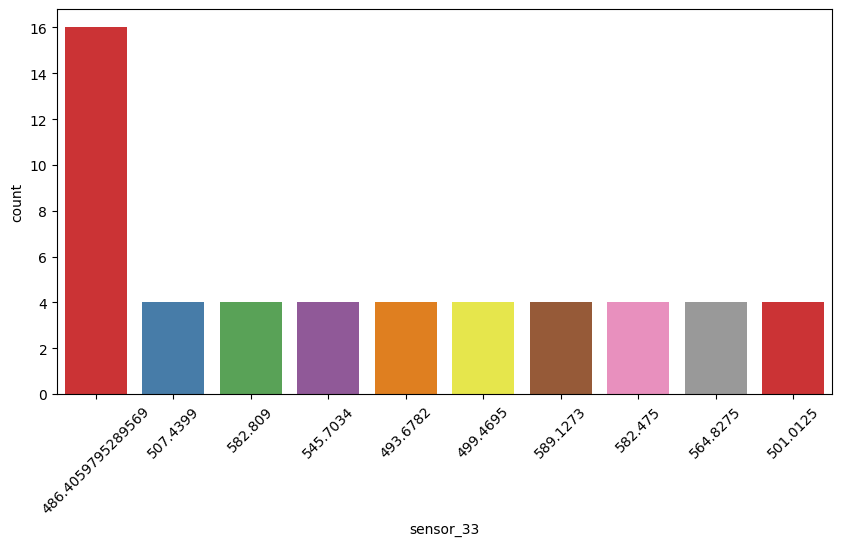

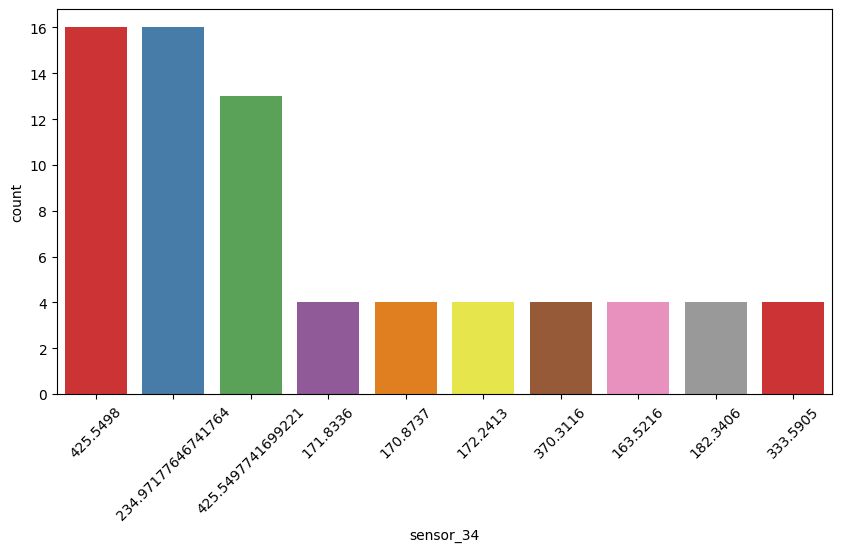

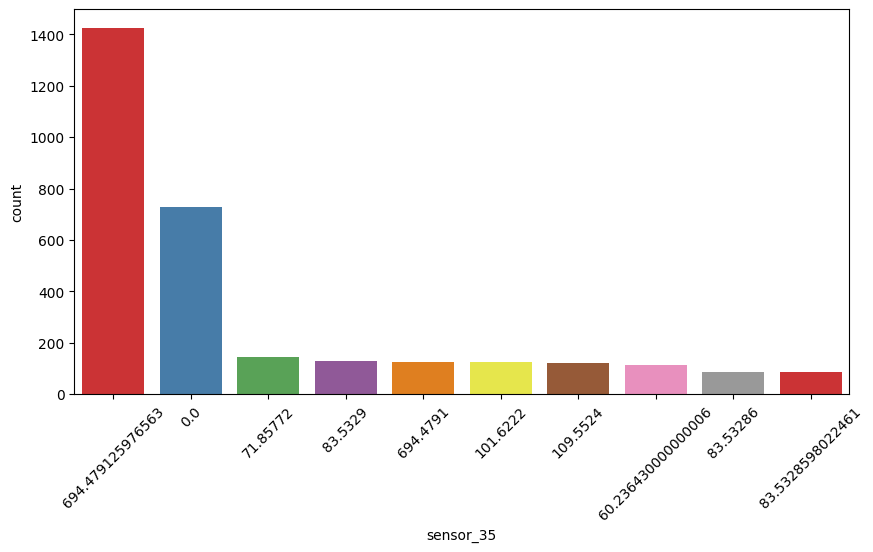

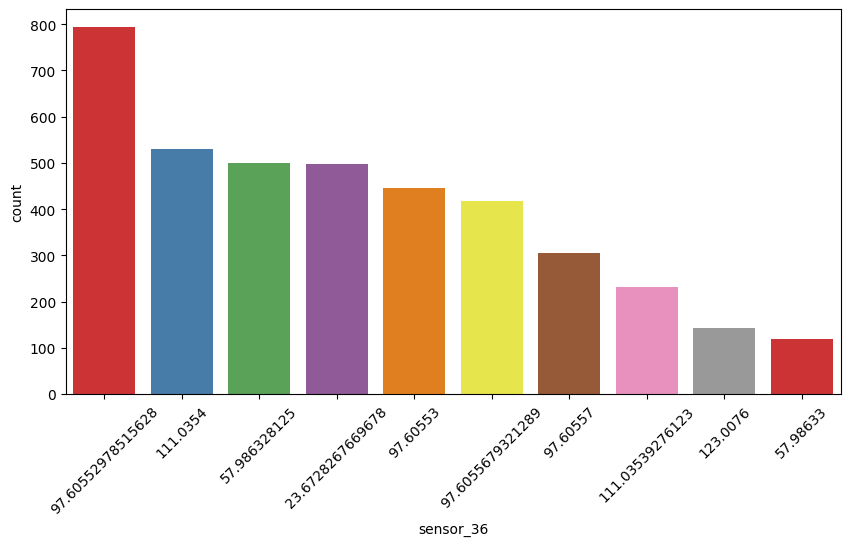

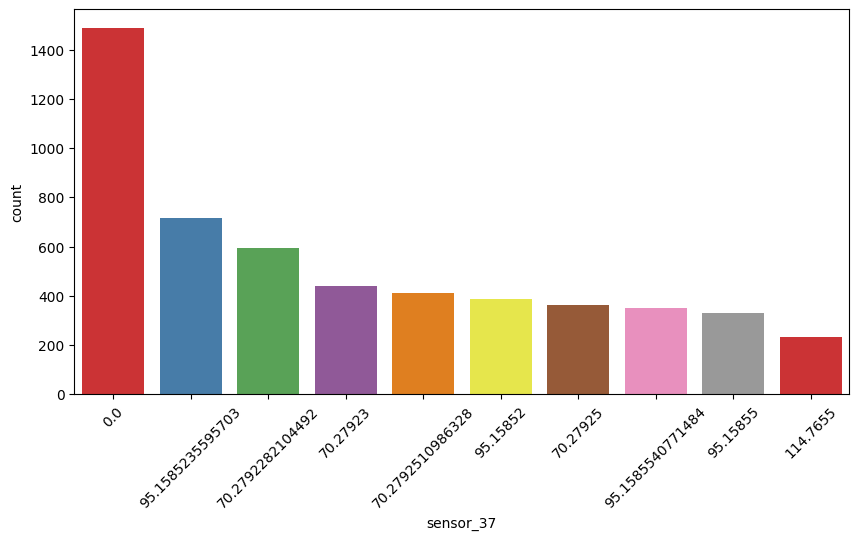

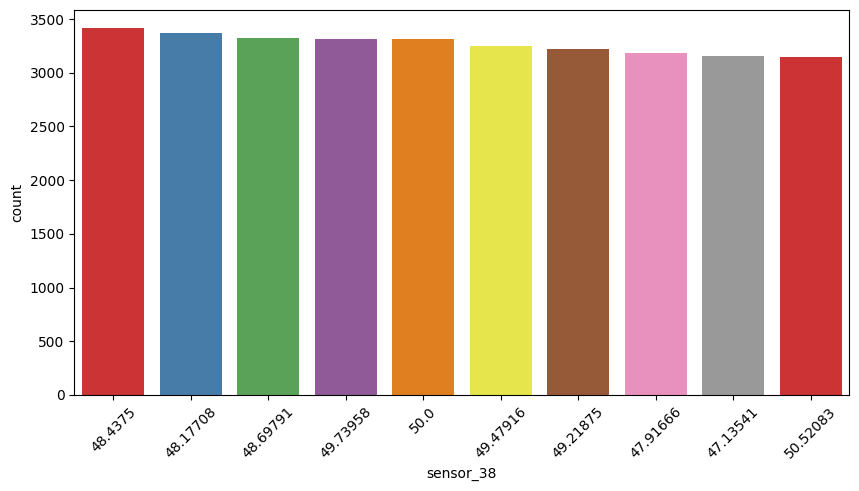

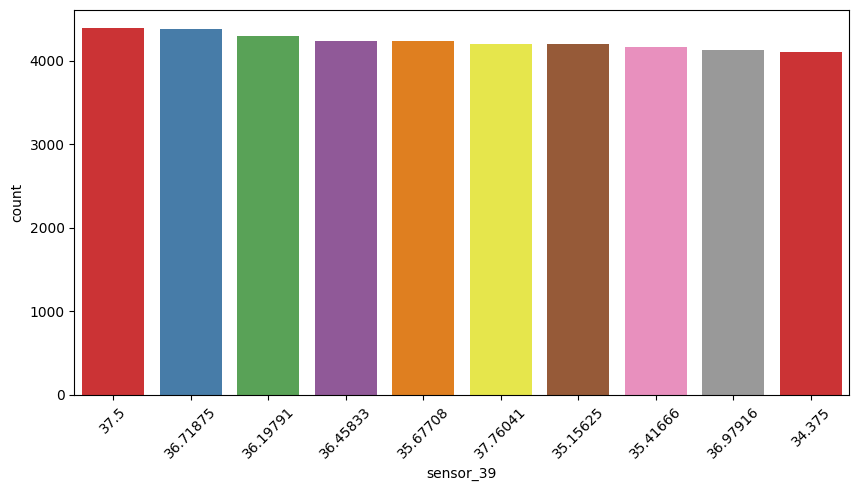

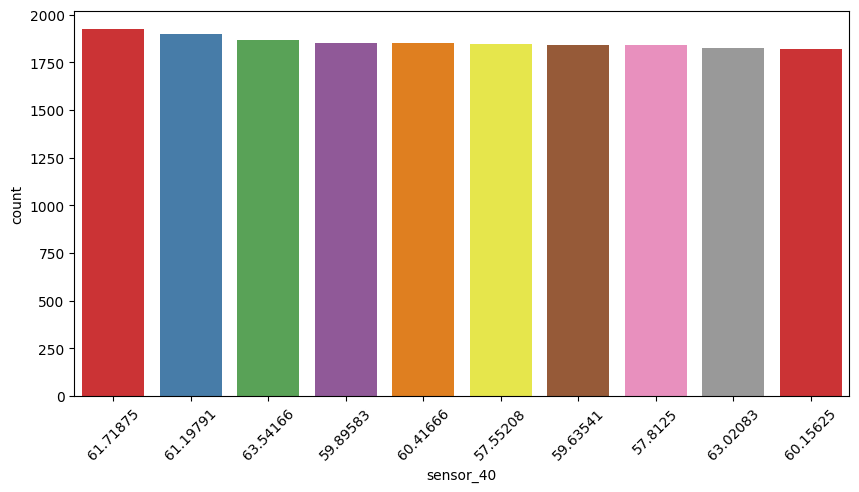

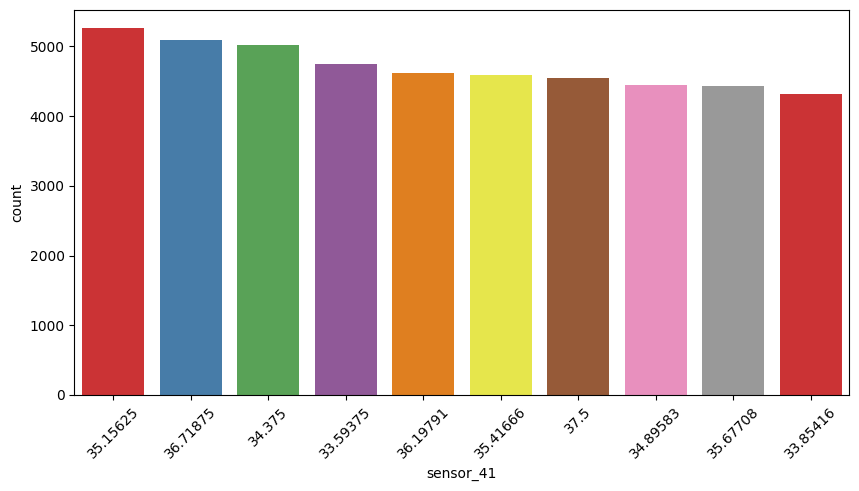

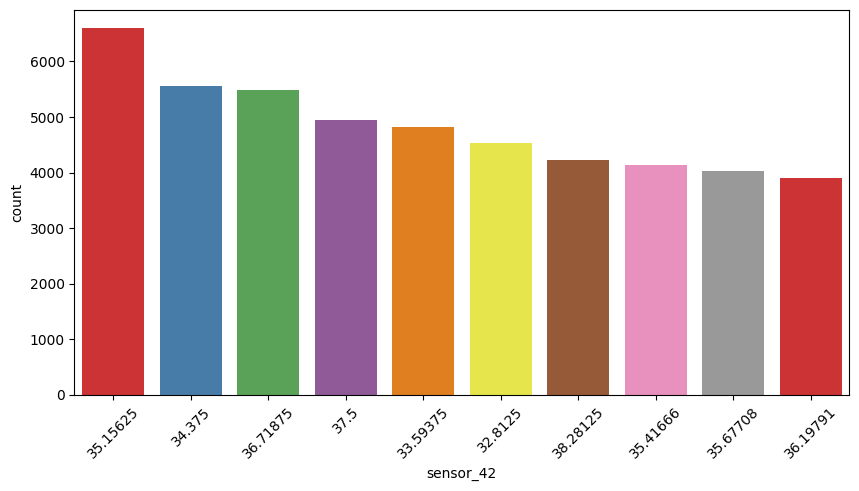

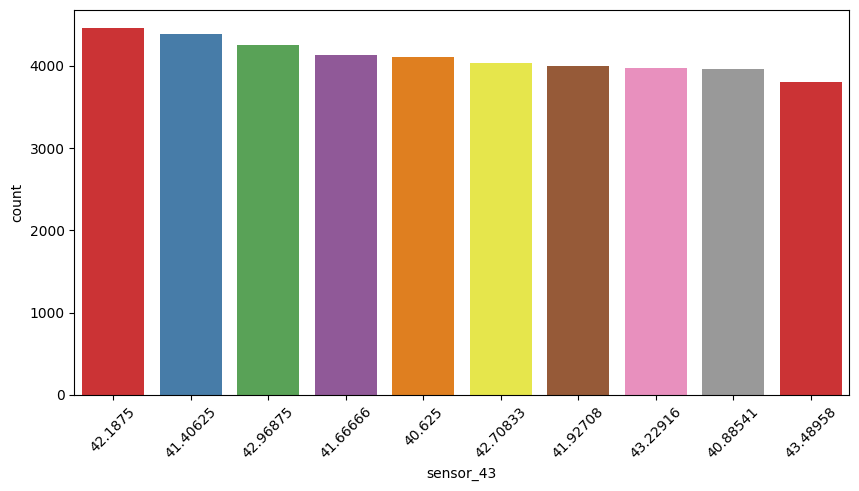

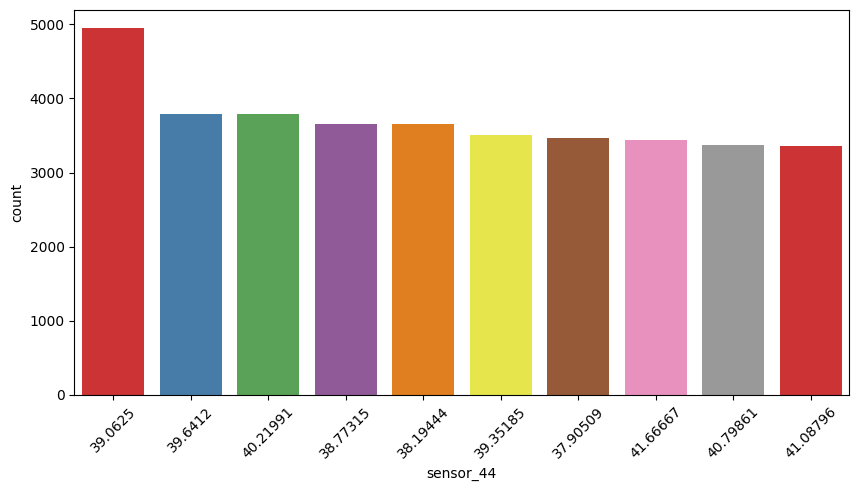

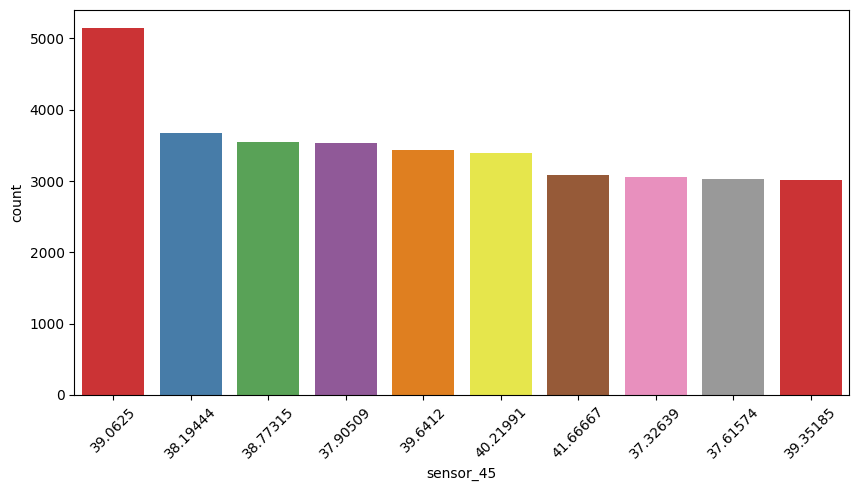

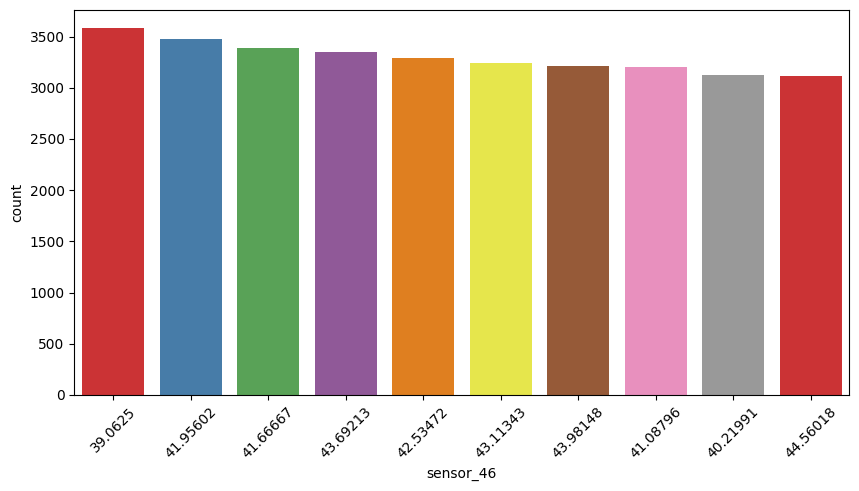

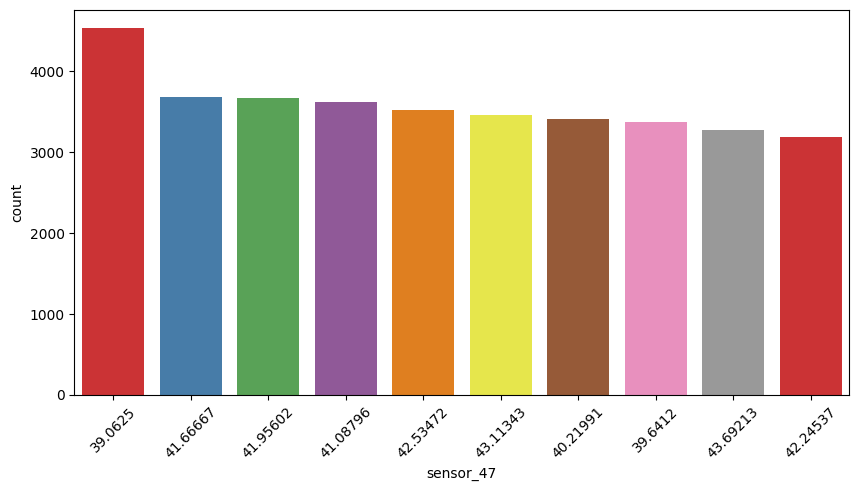

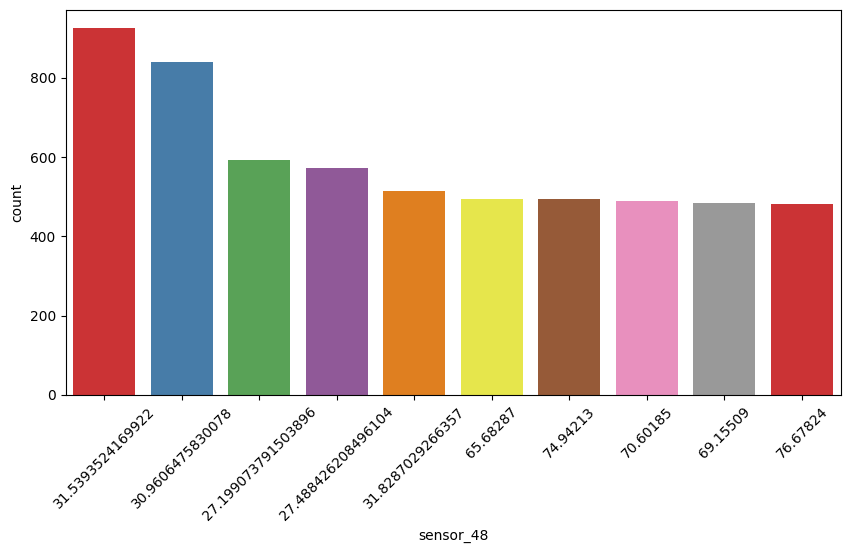

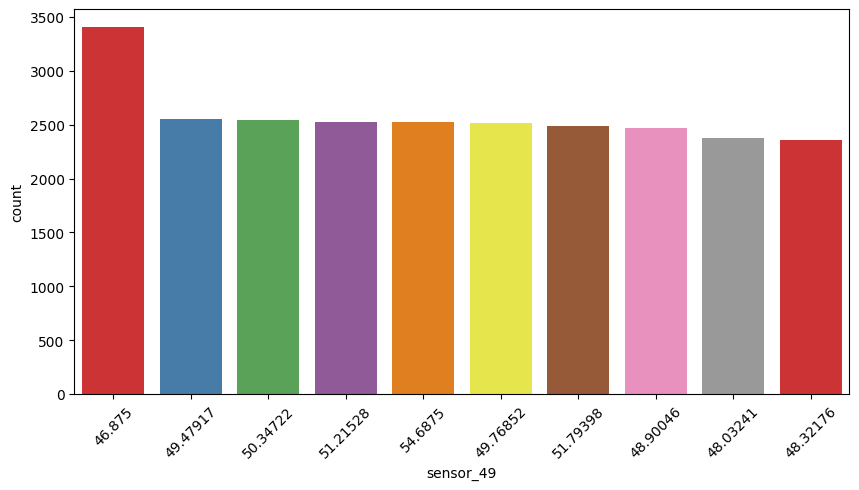

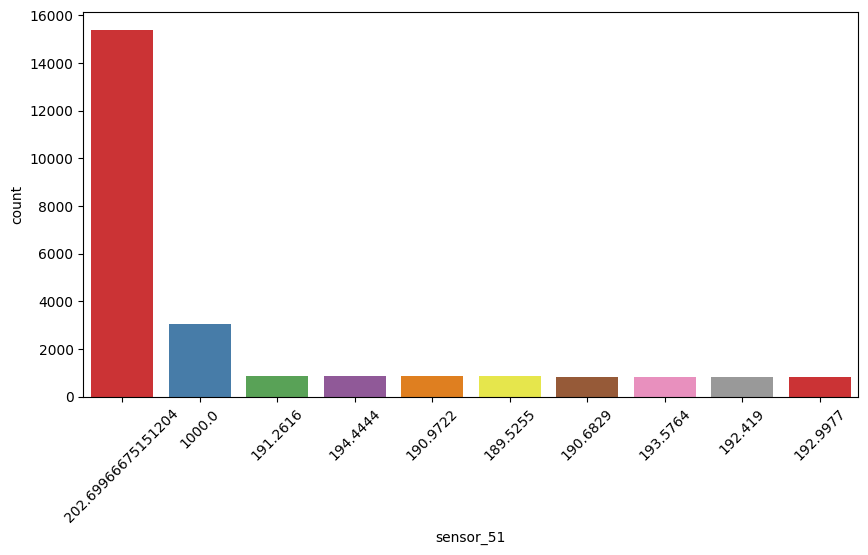

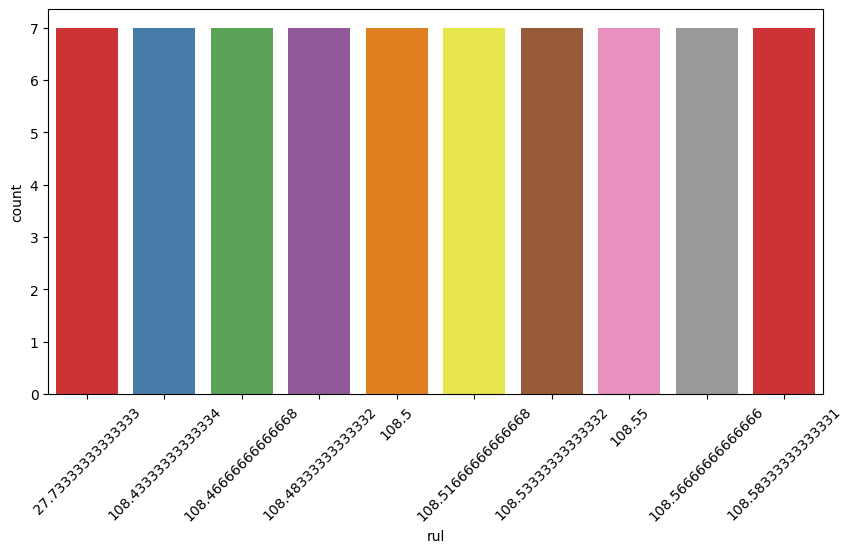

In [ ]:
num_col = df._get_numeric_data().columns
for i in num_col:
   if i in ['source']:
     continue
   plt.figure(figsize=(10, 5))
   chart = sns.countplot(
             data=df,
             x=i,
             palette='Set1',
# This option plot top category of numerical values.
             order=pd.value_counts(df[i]).iloc[:10].index
           )
   chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
   plt.show()

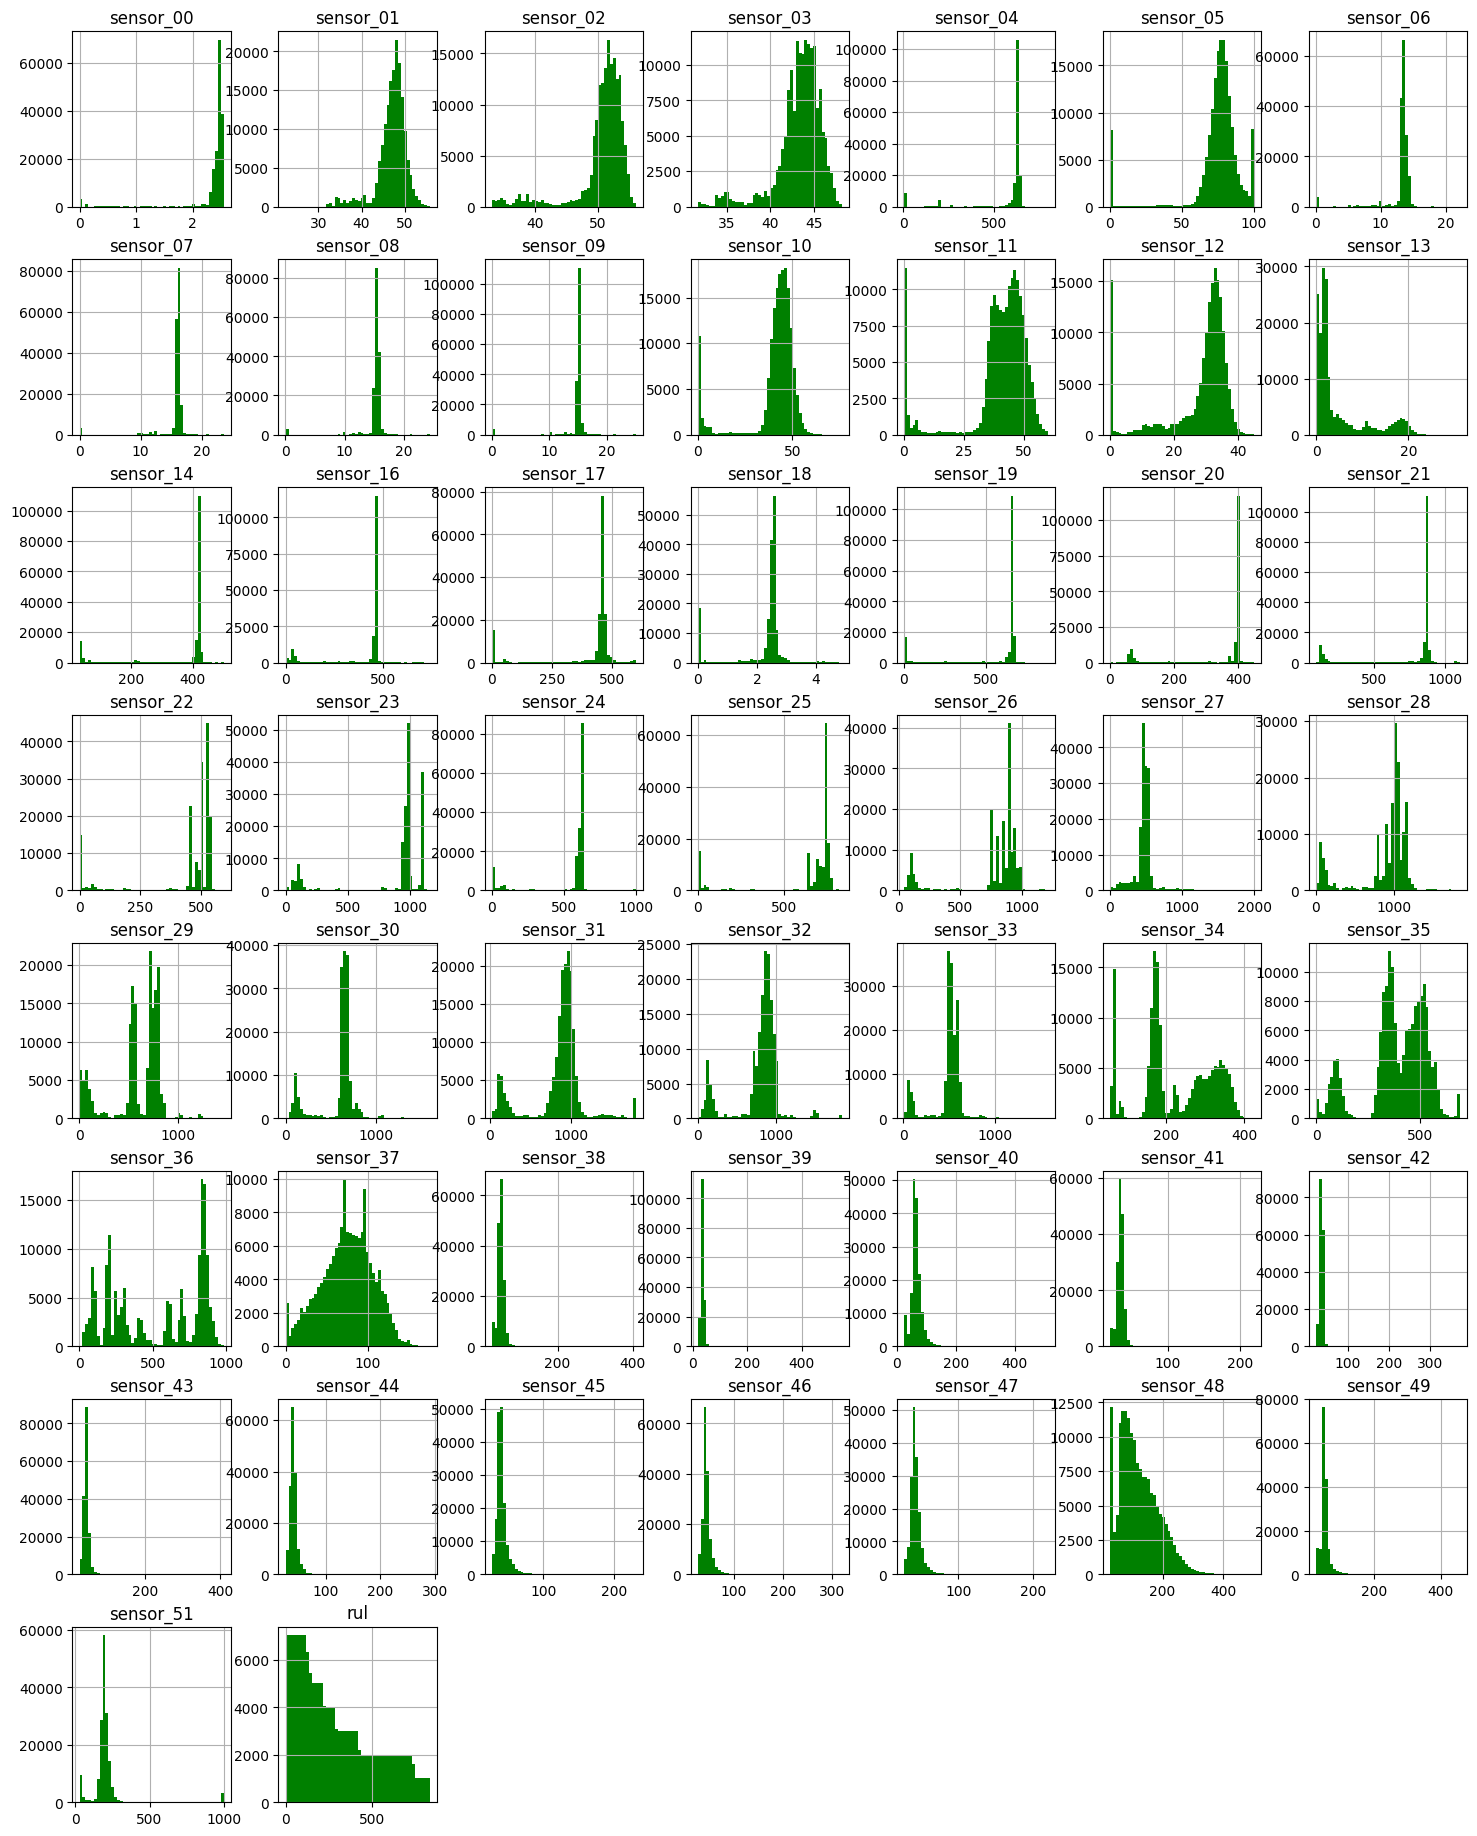

In [ ]:
df.hist(bins=50, figsize=(18,23), color="green")
plt.show()

In [ ]:
df.head(5)

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
1   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
2   2.444734   47.35243    53.2118  46.397570   638.8889   73.54598   
3   2.460474   47.09201    53.1684  46.397568   628.1250   76.98898   
4   2.445718   47.13541    53.2118  46.397568   636.4583   76.58897   

   sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  sensor_43  \
0   13.41146   16.13136   15.56713   15.05353  ...  31.770832   41.92708   
1   13.41146   16.13136   15.56713   15.05353  ...  31.770832   41.92708   
2   13.32465   16.03733   15.61777   15.01013  ...  31.770830   41.66666   
3   13.31742   16.24711   15.69734   15.08247  ...  31.510420   40.88541   
4   13.35359   16.21094   15.69734   15.08247  ...  31.510420   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_51         rul  
0   201.3889  285.916667  
1   201.3889  285.900000  
2   203.7037  285.883333  
3   203.1250  285.866667  
4   201.3889  285.850000  

[5 rows x 51 columns]

In [ ]:
df.nlargest(10, ['rul'])

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  sensor_05  \
77791   0.801794  47.482640  51.475693  42.795135  611.689800  64.329250   
77792   0.306945  47.526039  51.475690  42.795135  601.504600  81.626000   
77793   0.306945  47.569440  51.388890  42.795140  445.023100  95.616050   
77794   0.308912  47.569440  51.475690  42.838540    3.104745  97.971320   
77795   0.303993  47.612850  51.432290  42.838539    3.376736  94.972020   
77796   0.000000  47.699650  51.432290  42.838539    3.376736  41.016840   
77797   0.303993  47.612850  51.258680  42.838540    3.260995   6.289175   
77798   0.001968  47.786460  51.215270  42.925350    3.376736   0.964329   
77799   0.001968  47.829860  51.215270  42.968750    3.260995   0.147862   
77800   0.001968  48.003471  51.171870  43.012150    3.492477   0.022672   

       sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  sensor_43  \
77791   0.028935   16.65220   16.05903   15.55266  ...   179.9479   201.8229   
77792   0.028935   16.65220   15.84925   15.63947  ...   179.6875   197.9167   
77793   0.028935   16.56539   16.06626   15.55266  ...   171.6146   187.5000   
77794   0.014468   16.65220   16.29051   16.34838  ...   166.4063   180.2083   
77795   0.014468   16.70284   16.38455   16.35561  ...   162.7604   176.0417   
77796   0.014468   16.65220   16.38455   16.39902  ...   159.8958   171.8750   
77797   0.014468   17.12240   16.78241   16.39902  ...   157.2917   168.4896   
77798   0.014468   17.12240   16.60156   16.35561  ...   154.9479   165.1042   
77799   0.014468   17.07176   16.23264   16.35561  ...   152.8646   161.9792   
77800   0.028935   17.17303   16.42072   16.35561  ...   150.2604   158.8542   

       sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
77791   61.34259   55.26620  120.65970  146.12270   147.8588   64.23611   
77792   59.89583   53.81944  115.45140  137.73150   154.5139   69.15509   
77793   57.87037   51.79398   91.14584  104.74540   153.9352   72.91666   
77794   54.97685   49.18982   76.96759   88.25231   150.7523   76.38889   
77795   52.08333   47.45370   68.57639   78.70370   151.6204   81.01852   
77796   49.47917   45.42824   62.78935   72.62731   149.5949   84.20139   
77797   47.74306   43.98148   57.58102   66.84028   143.8079   84.49074   
77798   46.29630   43.40278   53.24074   61.34259   134.8380   83.04398   
77799   44.84954   42.24537   49.76852   57.87037   124.7106   80.15046   
77800   43.69213   41.08796   47.45370   54.68750   118.6343   81.01852   

       sensor_51         rul  
77791   266.7824  837.483333  
77792   272.5695  837.466667  
77793   276.0417  837.450000  
77794   274.5949  837.433333  
77795   259.5486  837.416667  
77796   247.3958  837.400000  
77797   234.9537  837.383333  
77798   223.0903  837.366667  
77799   214.4097  837.350000  
77800   207.1759  837.333333  

[10 rows x 51 columns]

In [ ]:
dfSample= df.sample(n=500)
X = dfSample.drop(['rul'], axis=1)
y = dfSample[['rul']]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
!pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:28<00:00,  1.46it/s]


Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
HistGradientBoostingRegressor                0.67       0.78  110.40   
BaggingRegressor                             0.66       0.77  113.33   
LGBMRegressor                                0.63       0.76  116.78   
RandomForestRegressor                        0.63       0.75  117.58   
GradientBoostingRegressor                    0.62       0.75  118.39   
ExtraTreesRegressor                          0.59       0.73  124.04   
XGBRegressor                                 0.54       0.70  130.60   
AdaBoostRegressor                            0.47       0.65  140.38   
DecisionTreeRegressor                        0.24       0.50  168.17   
ExtraTreeRegressor                           0.24       0.49  168.59   
KNeighborsRegressor                          0.08       0.39  185.09   
PoissonRegressor                            -0.05       0.30  198.06   
ElasticNetCV                                -0.14       0.24  206.35   
BayesianRidge                               -0.14       0.24  206.37   
RidgeCV                                     -0.14       0.24  206.53   
LassoLarsCV                                 -0.15       0.23  207.39   
LassoCV                                     -0.15       0.23  207.63   
Ridge                                       -0.16       0.23  207.68   
SGDRegressor                                -0.16       0.23  207.70   
LassoLarsIC                                 -0.16       0.23  208.49   
ElasticNet                                  -0.17       0.23  208.67   
Lasso                                       -0.17       0.22  209.06   
LassoLars                                   -0.17       0.22  209.06   
TransformedTargetRegressor                  -0.18       0.22  209.64   
LinearRegression                            -0.18       0.22  209.64   
LarsCV                                      -0.20       0.20  211.89   
TweedieRegressor                            -0.21       0.20  212.18   
GammaRegressor                              -0.22       0.19  213.42   
OrthogonalMatchingPursuit                   -0.28       0.15  218.29   
OrthogonalMatchingPursuitCV                 -0.28       0.15  218.29   
HuberRegressor                              -0.31       0.13  221.24   
PassiveAggressiveRegressor                  -0.39       0.07  228.16   
NuSVR                                       -0.49       0.01  236.23   
DummyRegressor                              -0.51      -0.00  237.06   
SVR                                         -0.53      -0.01  238.75   
QuantileRegressor                           -0.57      -0.04  242.07   
LinearSVR                                   -0.88      -0.25  265.11   
MLPRegressor                                -0.92      -0.28  267.76   
GaussianProcessRegressor                    -1.31      -0.54  293.73   
KernelRidge                                 -2.64      -1.42  368.56   
RANSACRegressor                             -3.50      -1.99  409.96   
Lars                                       -49.94     -32.85 1379.08   

                               Time Taken  
Model                                      
HistGradientBoostingRegressor        2.90  
BaggingRegressor                     0.11  
LGBMRegressor                        2.15  
RandomForestRegressor                3.46  
GradientBoostingRegressor            0.91  
ExtraTreesRegressor                  0.45  
XGBRegressor                         6.21  
AdaBoostRegressor                    0.25  
DecisionTreeRegressor                0.06  
ExtraTreeRegressor                   0.02  
KNeighborsRegressor                  0.05  
PoissonRegressor                     1.19  
ElasticNetCV                         0.22  
BayesianRidge                        0.06  
RidgeCV                              0.05  
LassoLarsCV                          0.29  
LassoCV                              1.39  
Ridge                     

[(0.0, 1.0)]

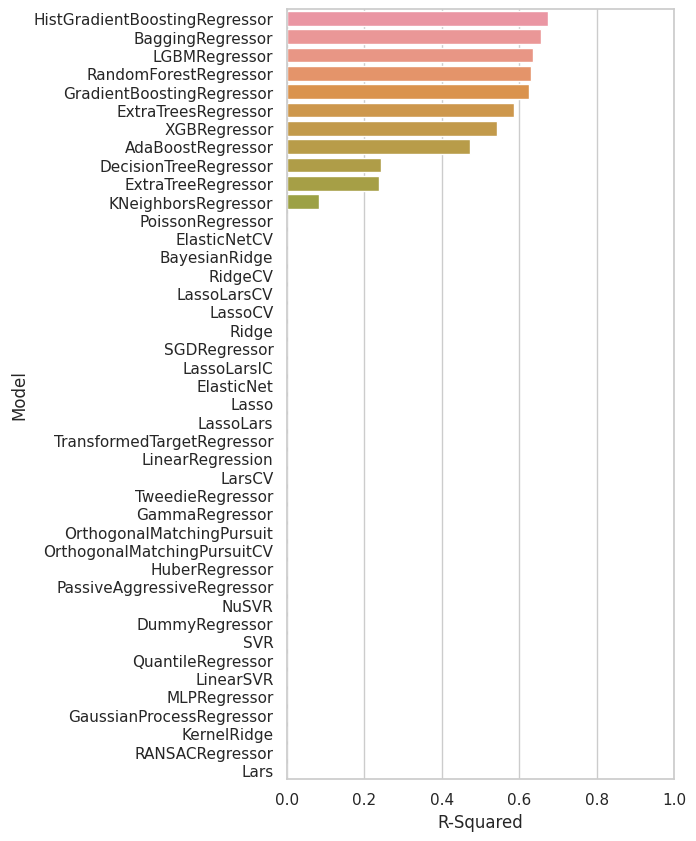

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models["R-Squared"] = [0 if i < 0 else i for i in models.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="R-Squared", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

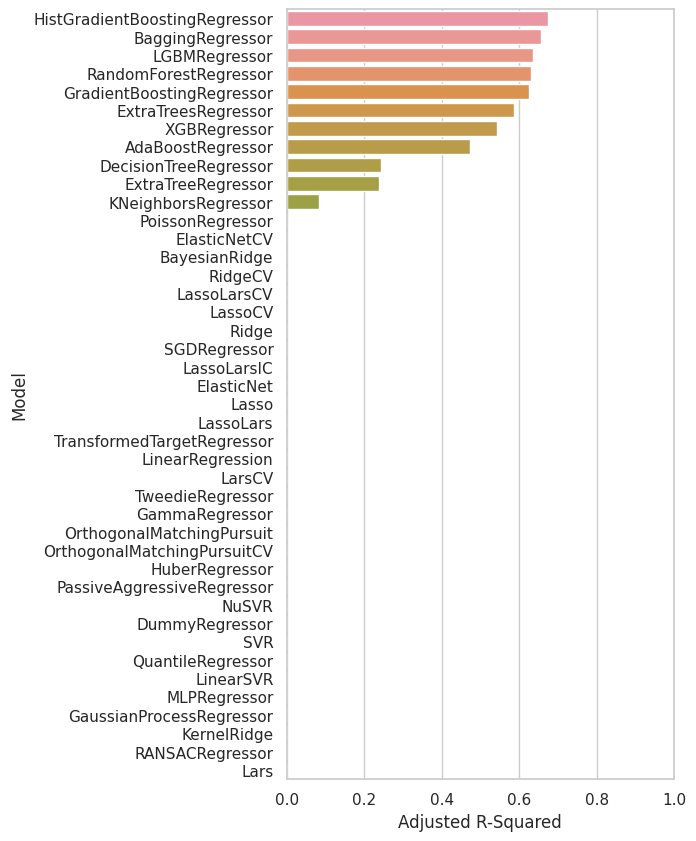

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

models["Adjusted R-Squared"] = [0 if i < 0 else i for i in models.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Adjusted R-Squared", data=models)
ax.set(xlim=(0, 1))

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(
   X_train, y_train)
reg.score(X_test, y_test)

0.7202873151383651

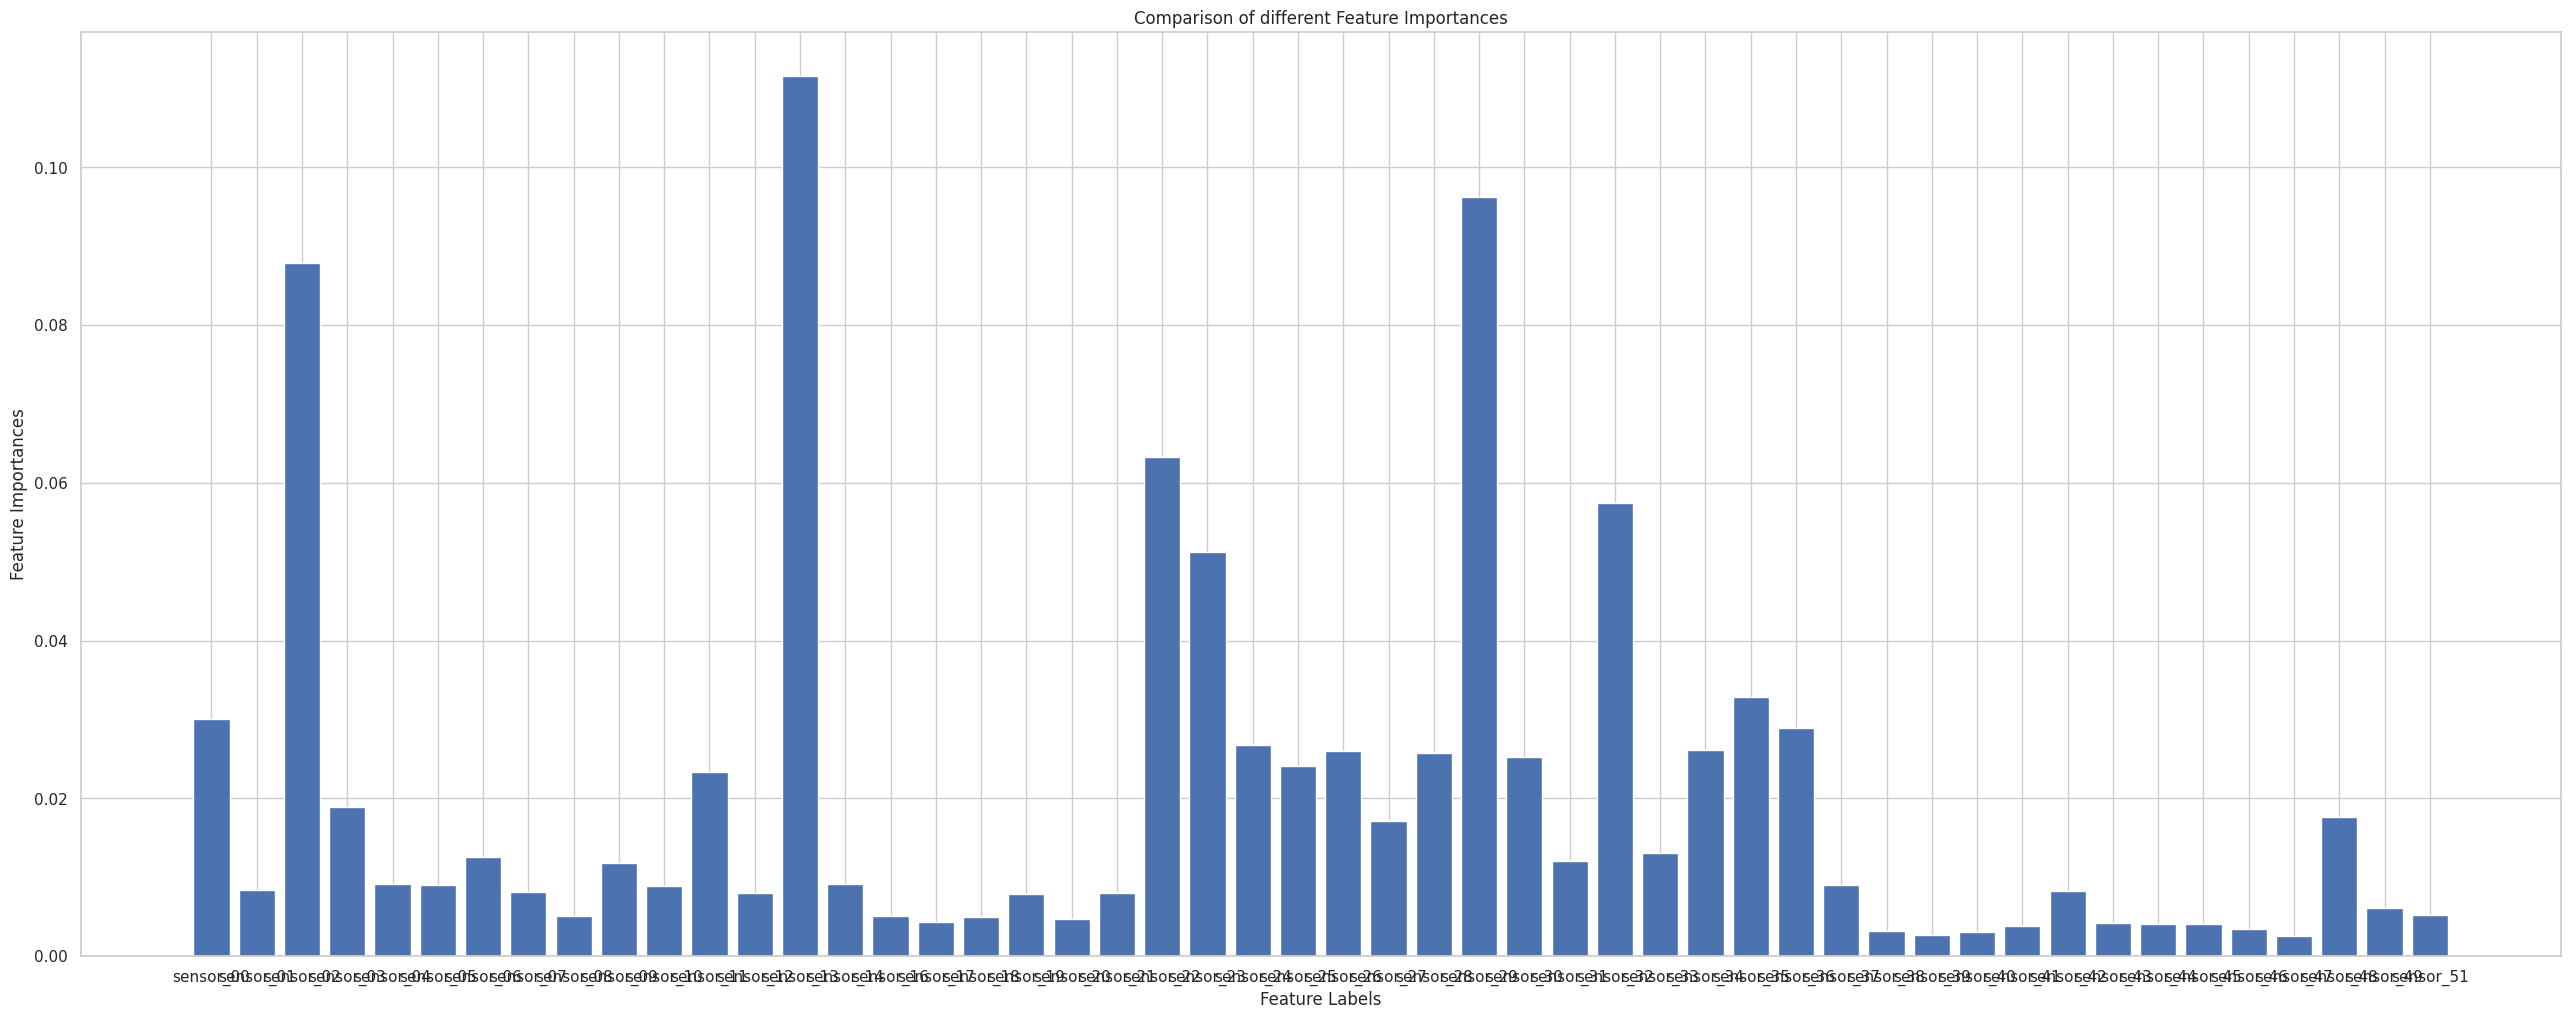

In [ ]:
# Computing the importance of each feature
#Feature Importance
feature_importance = reg.feature_importances_
# Plotting a Bar Graph to compare the models
plt.rcParams['figure.figsize'] = [32, 12]
plt.bar(X.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')

plt.show()

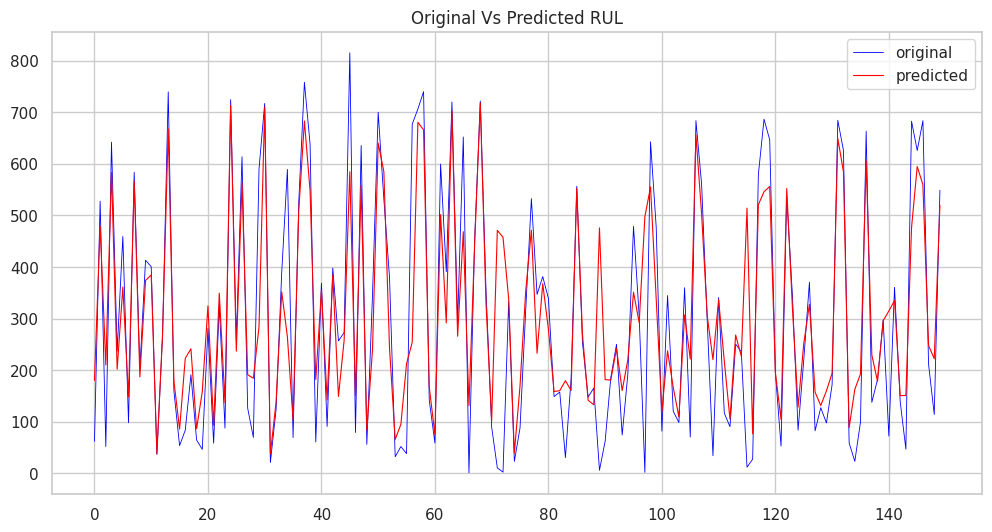

In [ ]:
ypred = reg.predict(X_test)
x_ax = range(len(y_test))
plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(x_ax, y_test, lw=0.6, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")

plt.title("Original Vs Predicted RUL")
plt.legend()
plt.show()